# Video Games Sales Analysis And Visualization

나의 룸메이트 중 한명인 Jabber는 비디오게임을 너무 좋아하고 사랑한다. 어느날 그는 내 방으로 와서 비디오 게임들에 대한 통계와 수치에 대해 물어봤고, '나는 브로 미안하지만 난 비디오게임을 잘모르는데 다른 방법으로 도와줄 수 있어'라고 했다. '게임에 대한 많은 정보가 있는 좋은 데이터셋을 알고 있어.그러니까 너가 알고싶은 걸 물어볼때마다 알아보고 이 데이터셋을 보여줄게'.  
그는 이 제안에 매우 만족했고 많은 질문을 하기 시작했다. 나는 '기다려 브로 import부터 해야해' 라고 말했다.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

import os
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\Users\이정진\Desktop\Kaggle\Videogame_sales\vgsales.ipynb
c:\Users\이정진\Desktop\Kaggle\Videogame_sales\data\vgsales.csv


In [2]:
data = pd.read_csv('c:/Users/이정진/Desktop/Kaggle/Videogame_sales/data/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


나=> 봐 여기 너의 비디오 게임 데이터야

In [3]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

나 => 2016이후 데이터에는 몇몇 안채워진 데이터가 있어서 지웠어.  
Jabber => 중요한거임?  
나 => 응. 분석할때 더 좋음. 불완전 데이터는 항상 분석에 방해가 되거든.  

In [4]:
data.shape

(16250, 11)

나=> 11컬럼, 16250개 데이터, 충분히 많군  
Jabber=> 11컬럼이랑 각 컬럼의 의미를 모르겠어  
나=> 설명해드림 ㄱㄷㄱㄷ

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


|Feature|Description|Datatype|
|:------|:-------------:|:----:|
|Rank|판매기록 순위|integer|
|Name|게임 이름|object|
|Platform|플랫폼명(PC,PS4등)|object|
|Year|발매년도|float|
|Genre|게임 장르|object|
|Publisher|게임 퍼블리셔|object|
|NA_Sales|북미 판매량(millions)|float|
|EU_Sales|유럽 판매량(millions)|float|
|JP_Sales|일본 판매량(millions)|float|
|Other_Sales|나머지 나라에서의 판매량(millions)|float|
|Global_Sales|전세계 총 판매량(millions)|float|

재버: 이제 컬럼의 의미는 알겠는데 타입은 왜 말해주는거?  
나: 하하 널 위한게 아니라 날 위한거야. 데이터 타입이 뭔지 분석을 위해서 알려고, 대부분 float, integer라 좋네  
재버: ??

In [6]:
display(data.describe())
display(data.describe(include=['object','bool']))

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

나: 좋은소식이있어, 결측치가 많지 않네. 정보손실이 별로 없단 소리야. 내가 잘만들어진 데이터라 그랬지?  
재버: 뭣이중한디? 언제 질문할수 있는건데?  
나: 음... 지금?  
그는 질문세례를 쏟아내기 시작했다.

# Q1. 어떤 장르 게임이 제일 많이 만들어졌어?

In [8]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

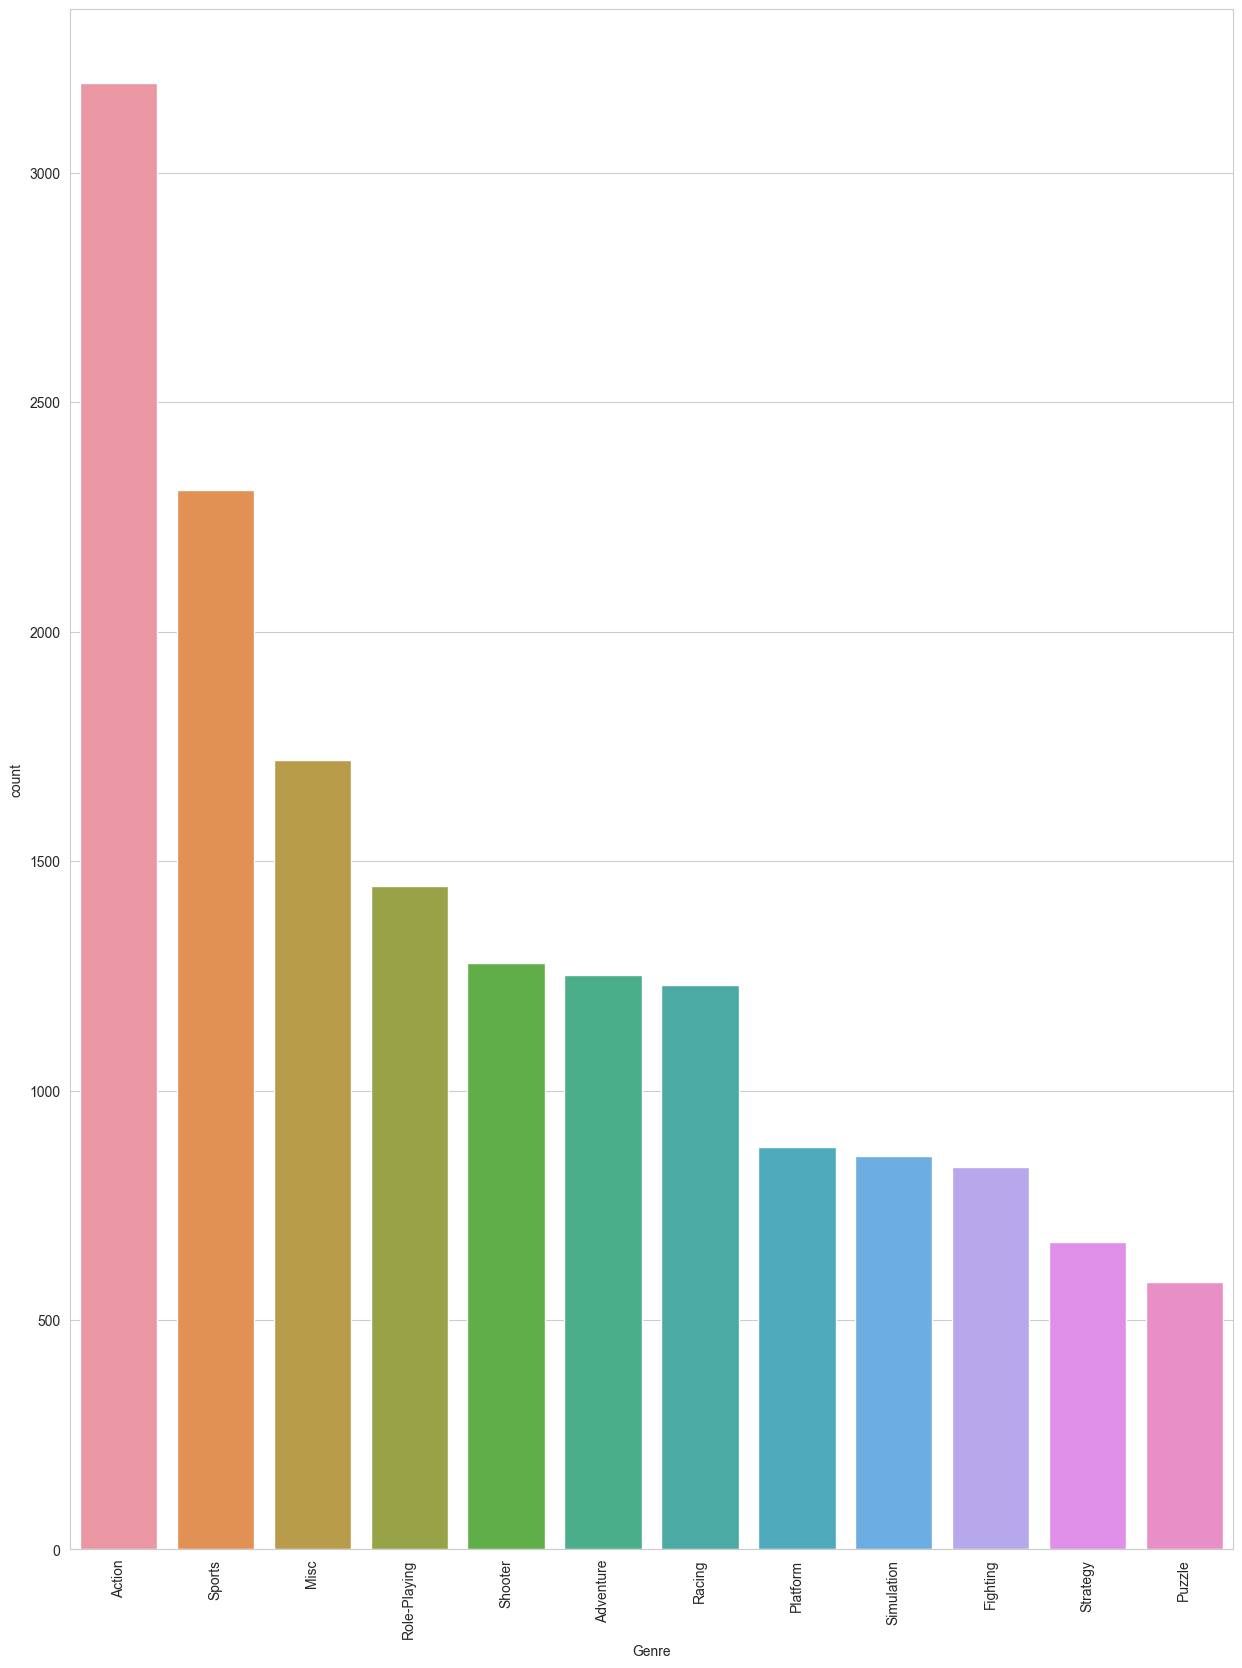

In [9]:
plt.figure(figsize=(15,20))
sns.countplot(x='Genre',data=data,order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)

나: Action이랑 Sports가 가장 많네. 각각 3196, 2308개 발매됐어. 너는 뭘 젤 조아해?  
재버: 액션  
나: 그럴줄 알았어 다음?

# Q2. 몇년도에 제일 많은 게임이 발매됐어?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

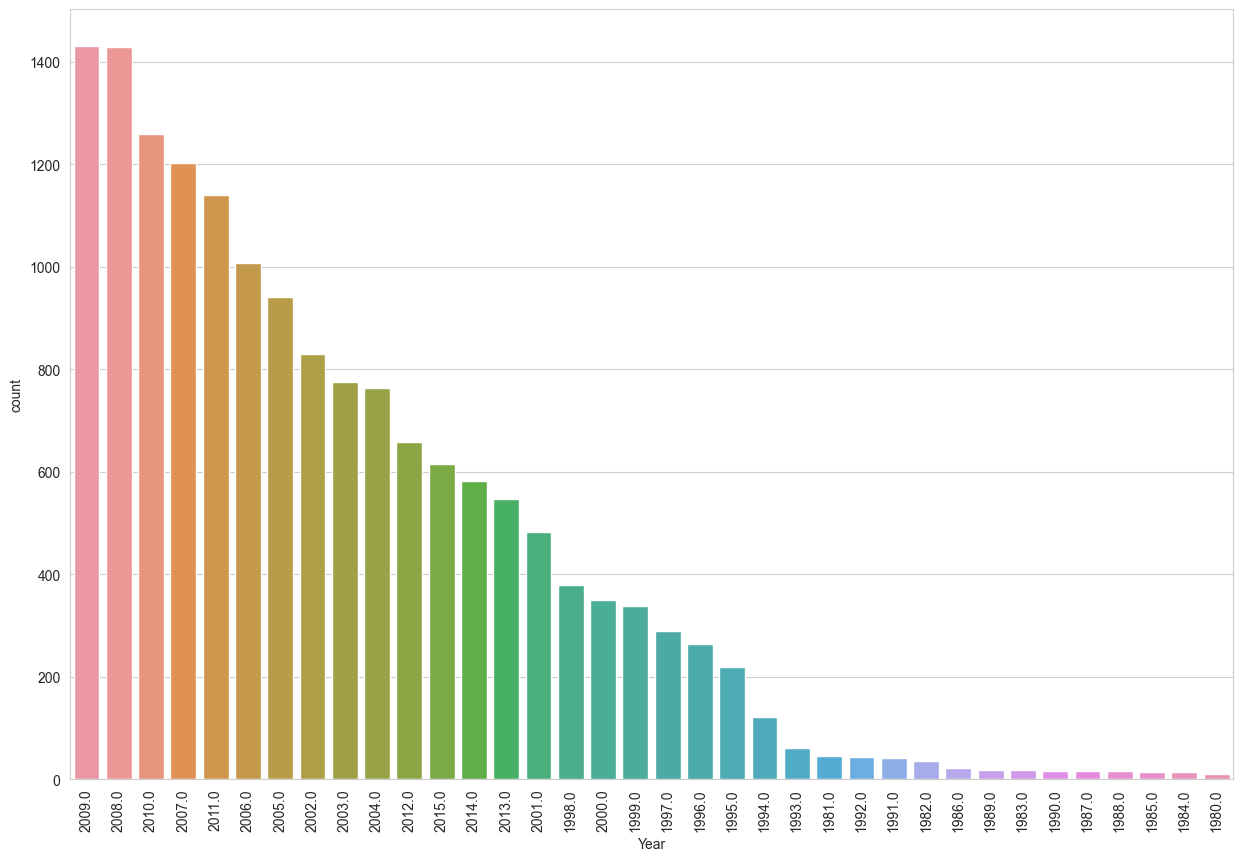

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Year',data=data, order=data.groupby('Year')['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

2009,2008,2010,2007,2011 순이네. 내가더 재밌는거 보여줄게

# Q3. 장르별 Top5 게임

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

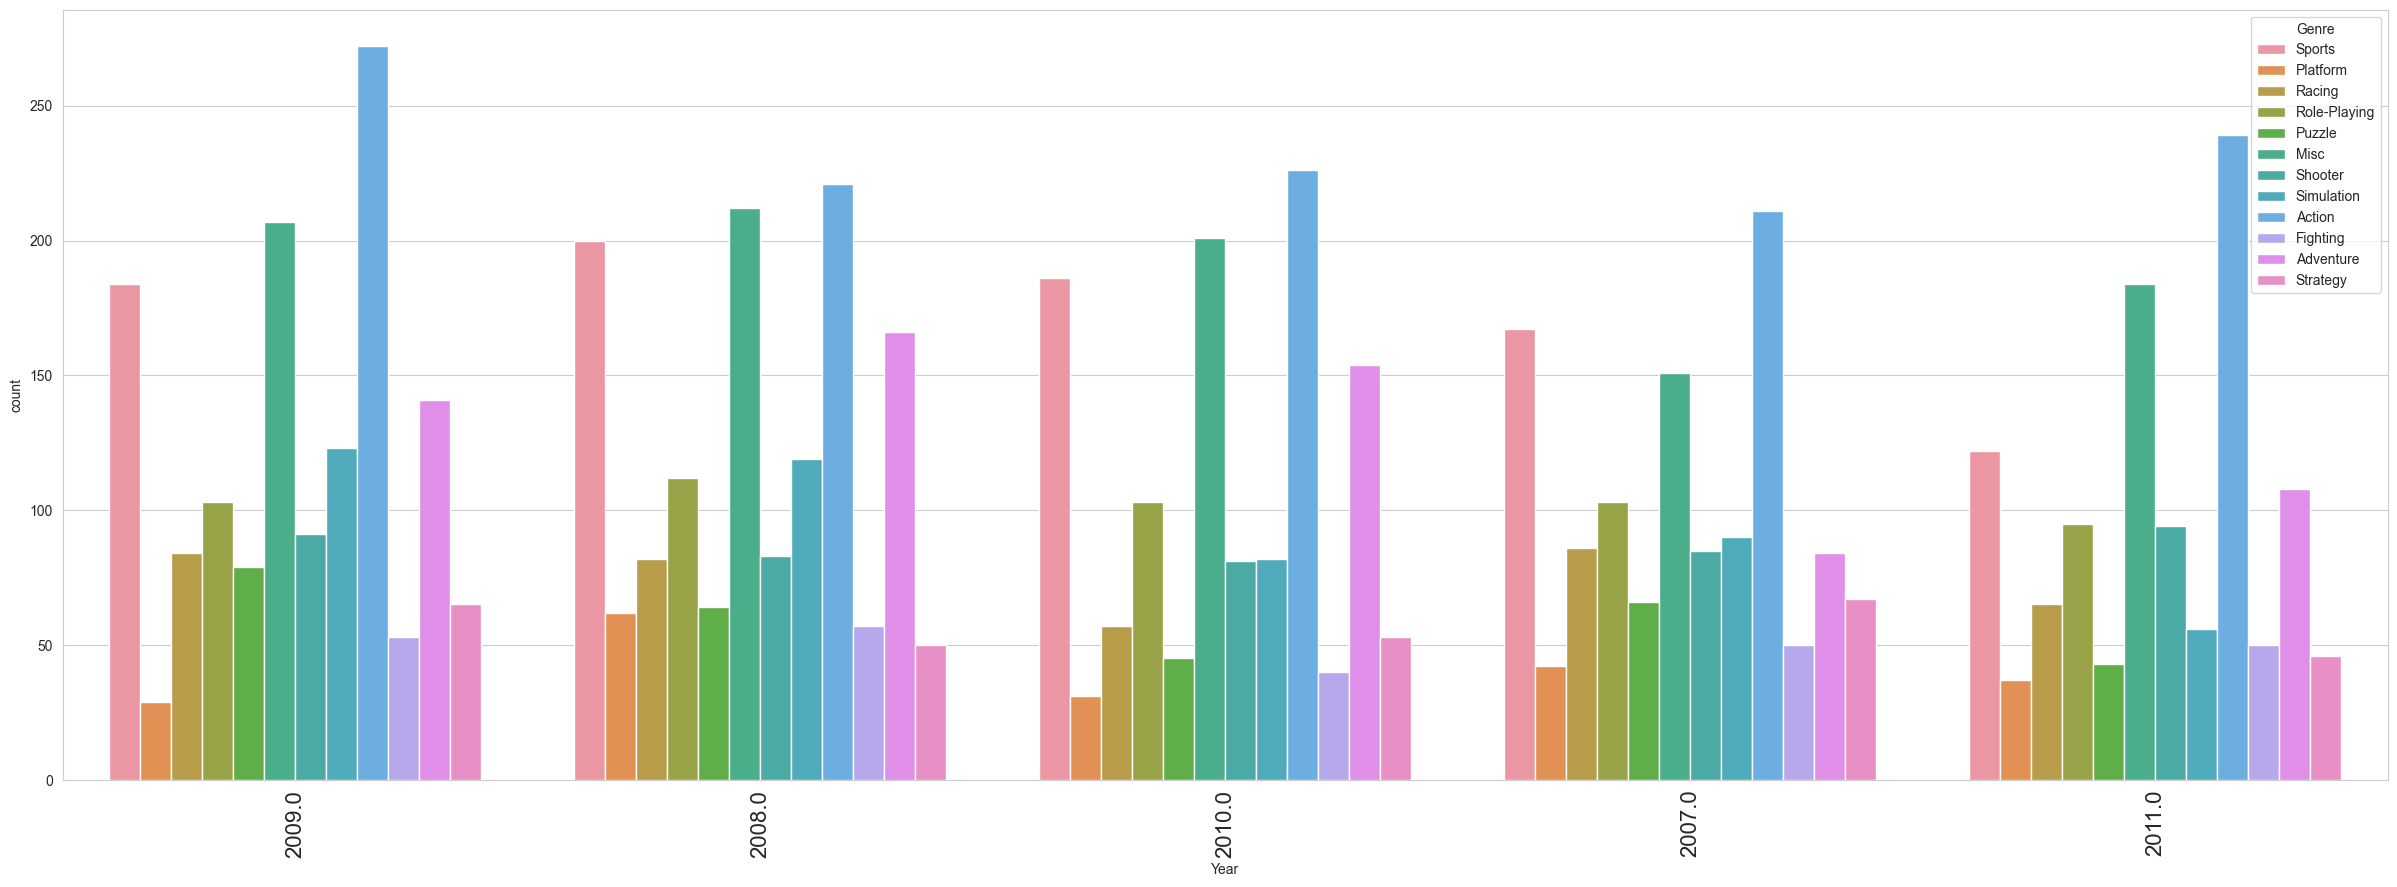

In [11]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Year',data=data, hue='Genre',order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

나: 어떤데?  
재버: 오 나이스 액션은 항상 top이네  
나: 삘받았어 다음  

# Q4. 몇년도에 전세계적으로 가장 많은 판매량을 기록했어?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

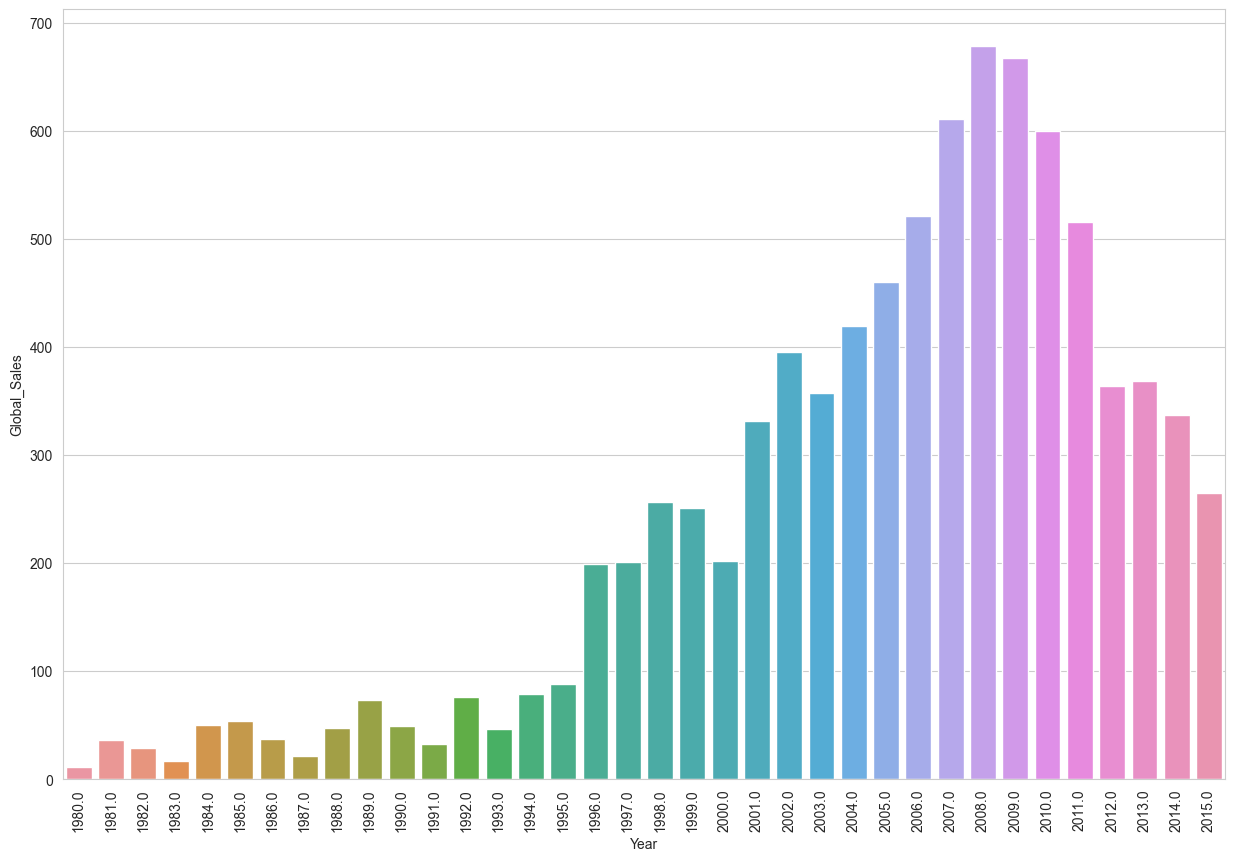

In [12]:
data_year = data.groupby(by=['Year'],as_index=False)['Global_Sales'].sum()
data_year.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

2008년 6억7890만  
2009년 6억6730만  
2007년 6억1130만  
2010년 6억45만  
2006년 5억2104만  
2006년은 발매top5가 아니었는데 판매량이 높네


# Q5. 어떤장르의 게임이 1년동안 가장 많이 발매됐어?

In [13]:
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby('Year')['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Shooter,3
5,1985.0,Puzzle,4
6,1986.0,Platform,6
7,1987.0,Sports,4
8,1988.0,Platform,4
9,1989.0,Puzzle,5


In [14]:
genre = year_max_genre['Genre'].values
genre[0]

'Misc'

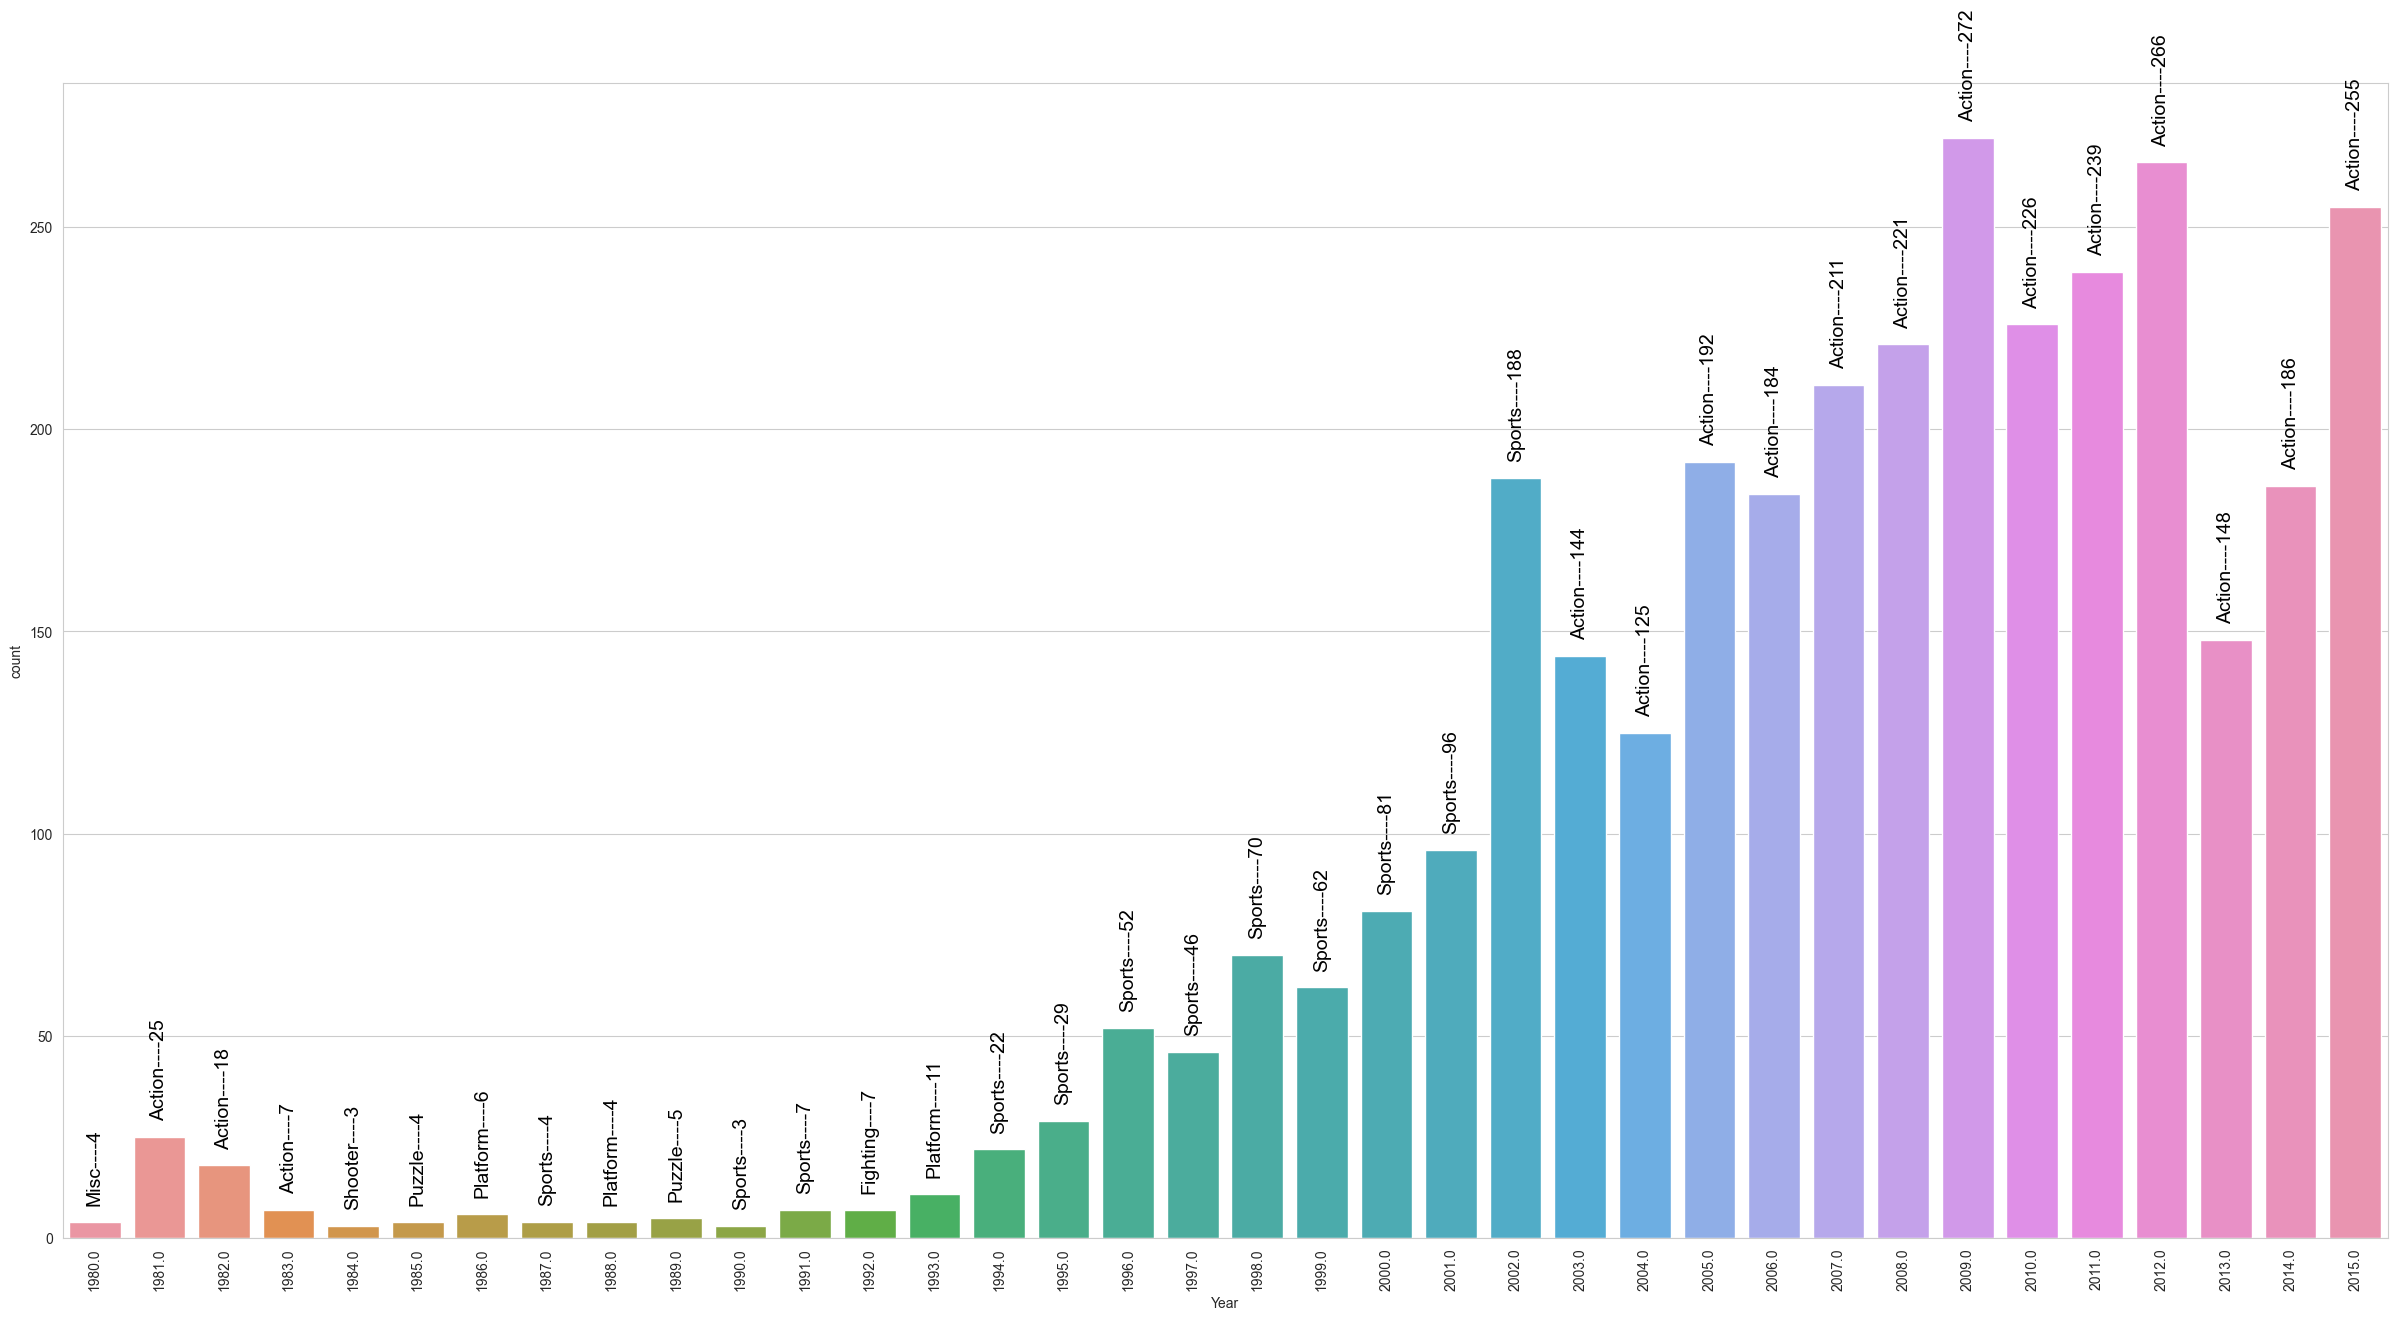

In [15]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data = year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value+5, str(genre[index]+'----'+str(value)), color='#000', # value+5: value값 높이보다 5 위에
           size=14, rotation=90, ha='center')
    index += 1
plt.xticks(rotation=90)
plt.show()

2009년에 액션만 272개가 발매됐네, 두번째로 많은 2012년에도 266개가 발매됐어

# Q6. 어떤 장르의 게임이 1년기준 가장 많이 팔렸어?

In [16]:
year_sale_dx = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby('Year')['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
year_sale_max

,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10
5,1985.0,Platform,43.17
6,1986.0,Action,13.74
7,1987.0,Fighting,5.42
8,1988.0,Platform,27.73
9,1989.0,Puzzle,37.75


In [17]:
genre = year_sale_max['Genre']

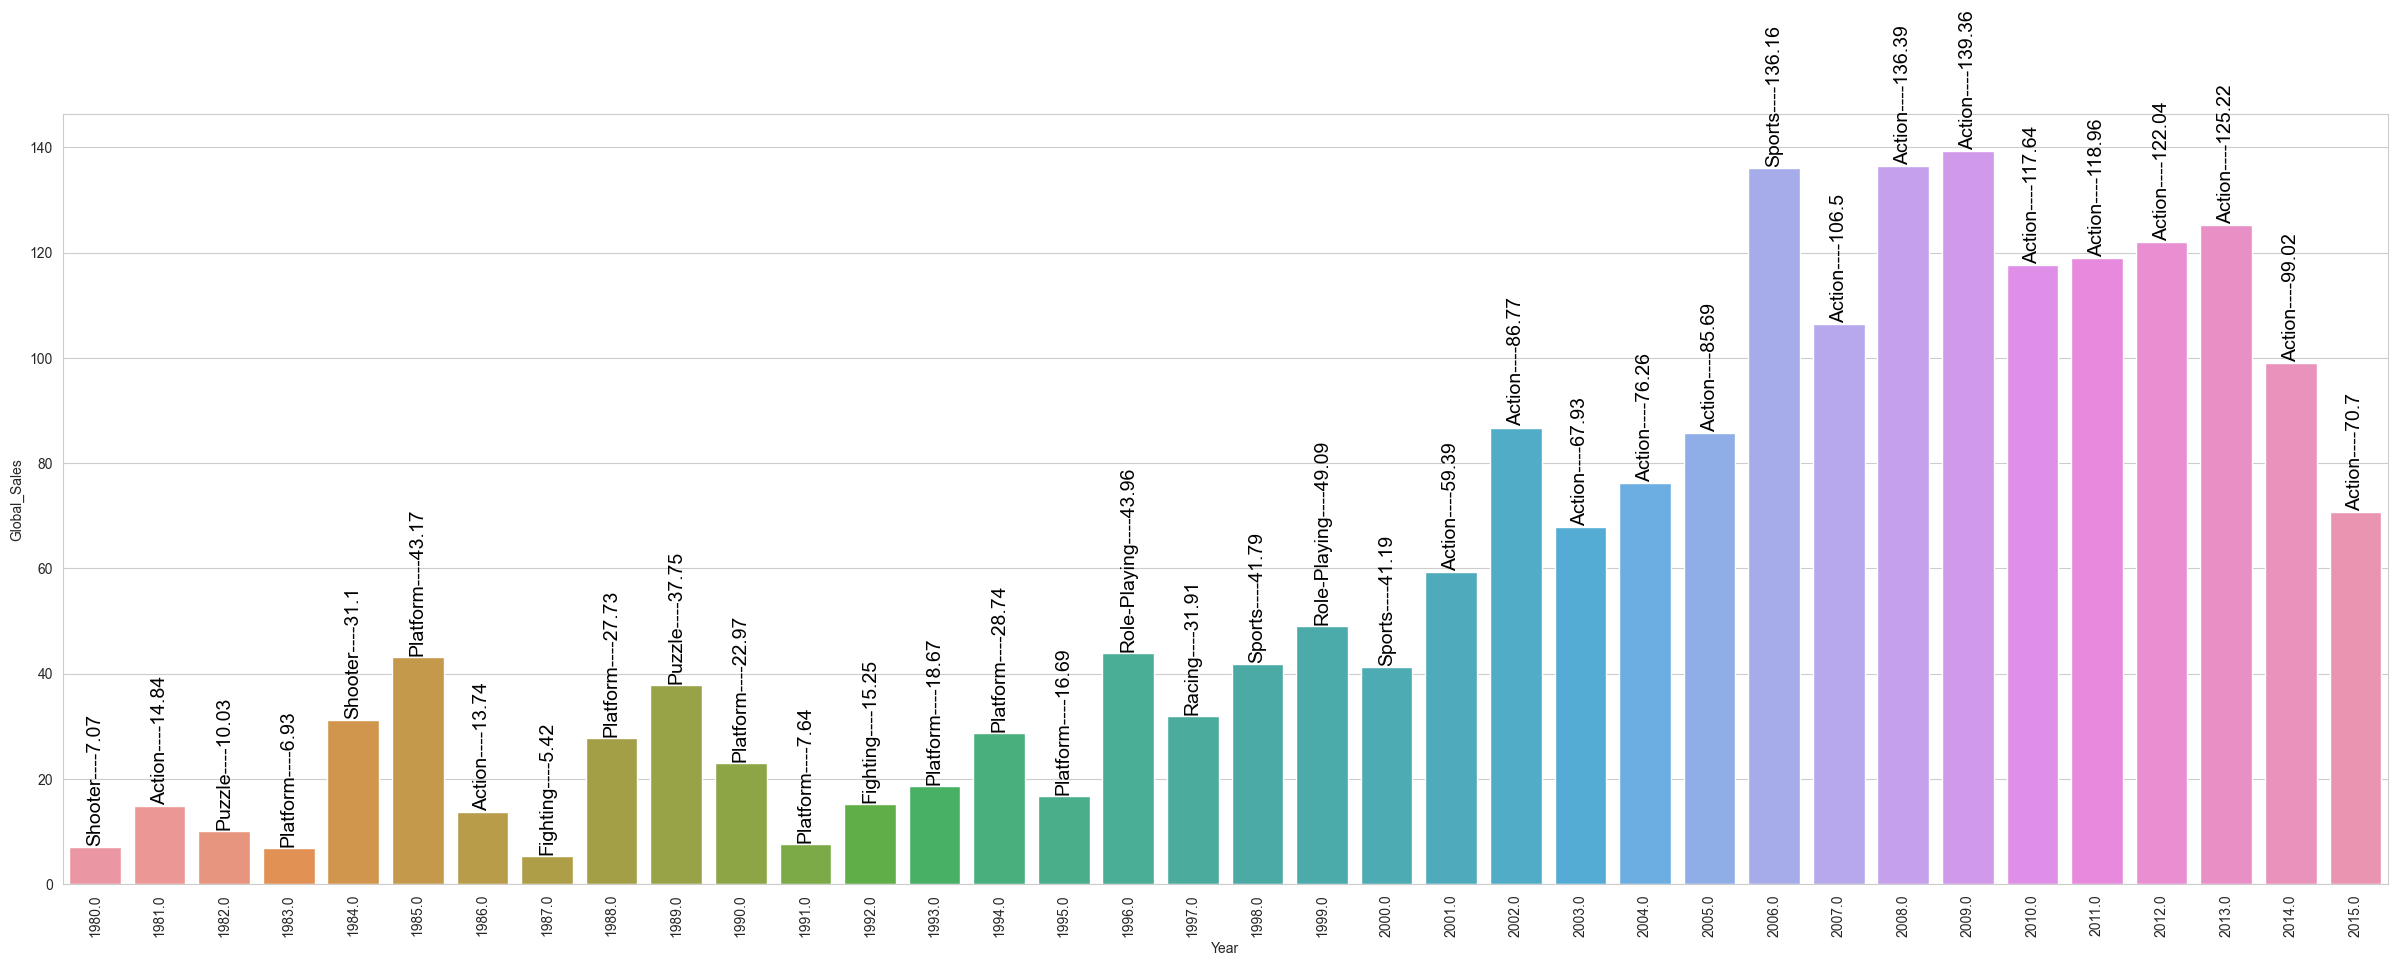

In [18]:
plt.figure(figsize=(30, 10))
g = sns.barplot(x='Year', y='Global_Sales', data = year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value+1, str(genre[index]+'----'+str(round(value, 2))),
           color='#000', size=14, rotation=90, ha='center')
    index += 1
plt.xticks(rotation=90)
plt.show()

2009년에 액션이 1억3936만, 2008년에 액션 1억3639만이 팔렸다

# Q7. 어떤 게임이 전세계에서 가장 많은 매출을 기록했어?

In [19]:
data_genre = data.groupby('Genre')['Global_Sales'].sum().reset_index().\
                  sort_values('Global_Sales', ascending=False)
data_genre


,Genre,Global_Sales
0,Action,1731.26
10,Sports,1316.33
8,Shooter,1019.15
7,Role-Playing,920.57
4,Platform,829.30
3,Misc,808.79
6,Racing,730.40
2,Fighting,445.05
9,Simulation,391.52
5,Puzzle,244.95


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

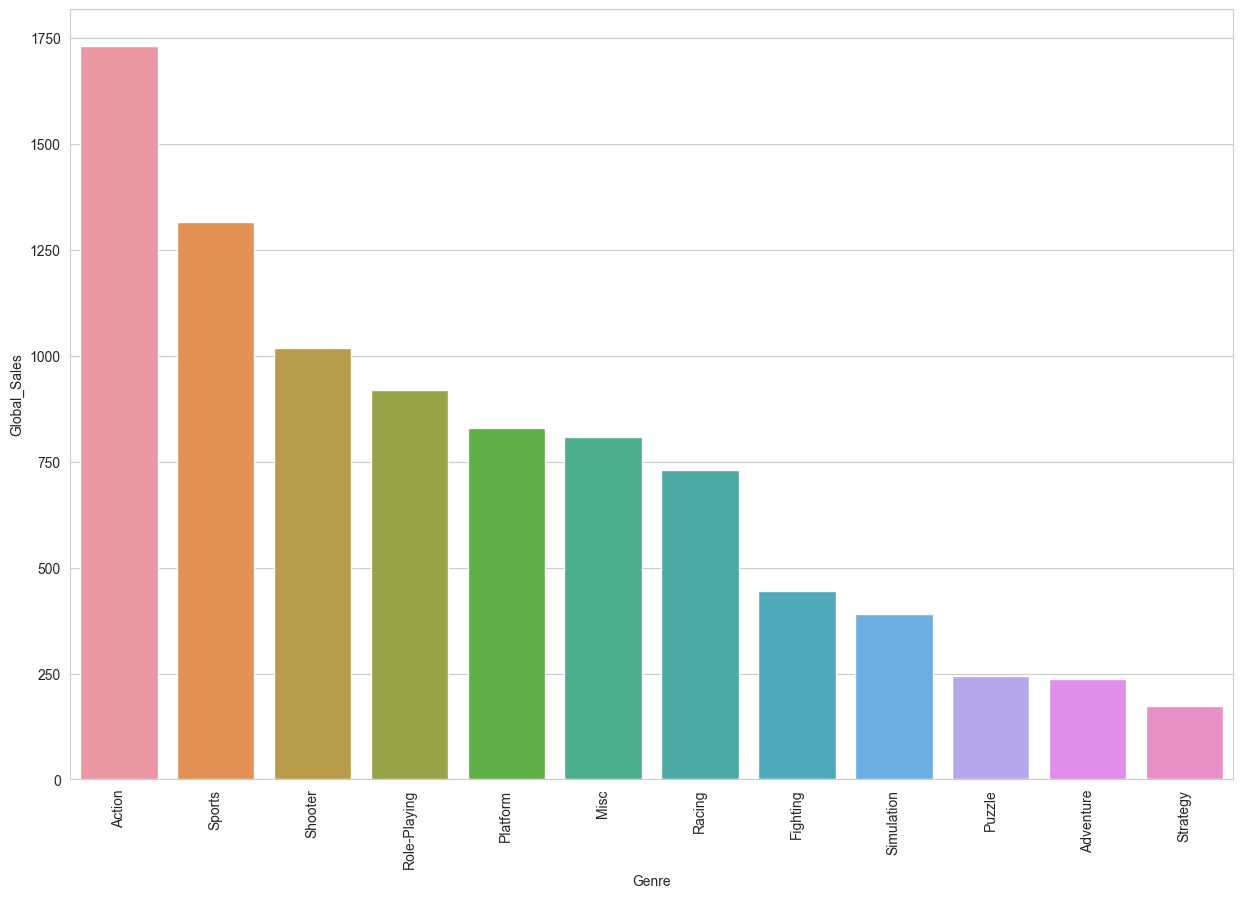

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Global_Sales', data=data_genre)
plt.xticks(rotation=90)

액션과 스포츠는 항상 top에 있다. 3번째는 슈터 장르인데 Q1.에서 5위를 한 것과는 다르다.

# Q8. 어떤 플랫폼이 전세계에서 가장 많은 매출을 기록했어?

In [21]:
data_platform = data.groupby('Platform')['Global_Sales'].sum().reset_index().\
                     sort_values('Global_Sales', ascending=False)
data_platform

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.13
17,PS3,955.25
26,Wii,926.71
4,DS,822.20
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
29,XB,258.26
13,PC,256.22


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

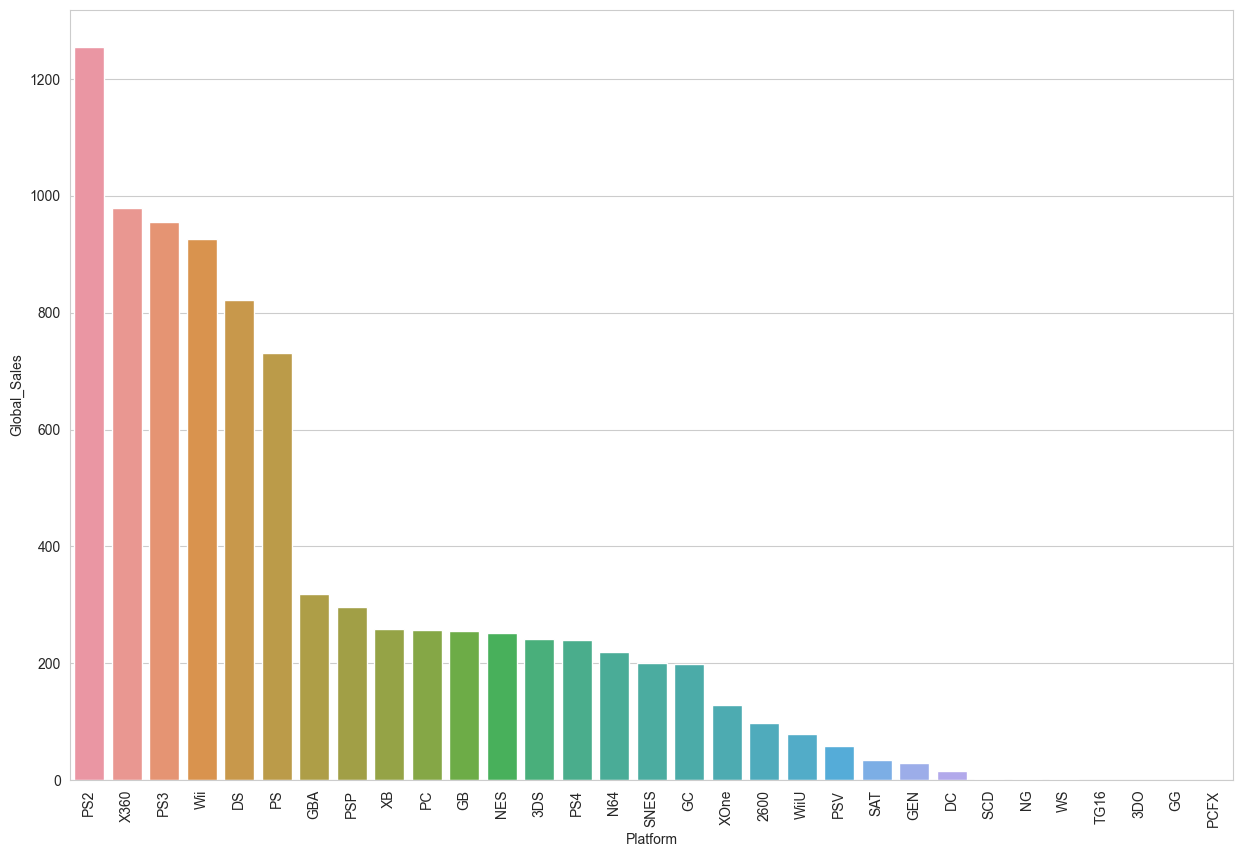

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Platform', y='Global_Sales', data=data_platform)
plt.xticks(rotation=90)

PS2가 가장 많다

# Q9. 가장 많이 팔린 게임은?

In [23]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name','Year','Genre','Global_Sales']].\
                sort_values('Global_Sales', ascending=False)
top_game_sale

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,30.01
7,Wii Play,2006.0,Misc,29.02
8,New Super Mario Bros. Wii,2009.0,Platform,28.62
9,Duck Hunt,1984.0,Shooter,28.31


In [24]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0,20)

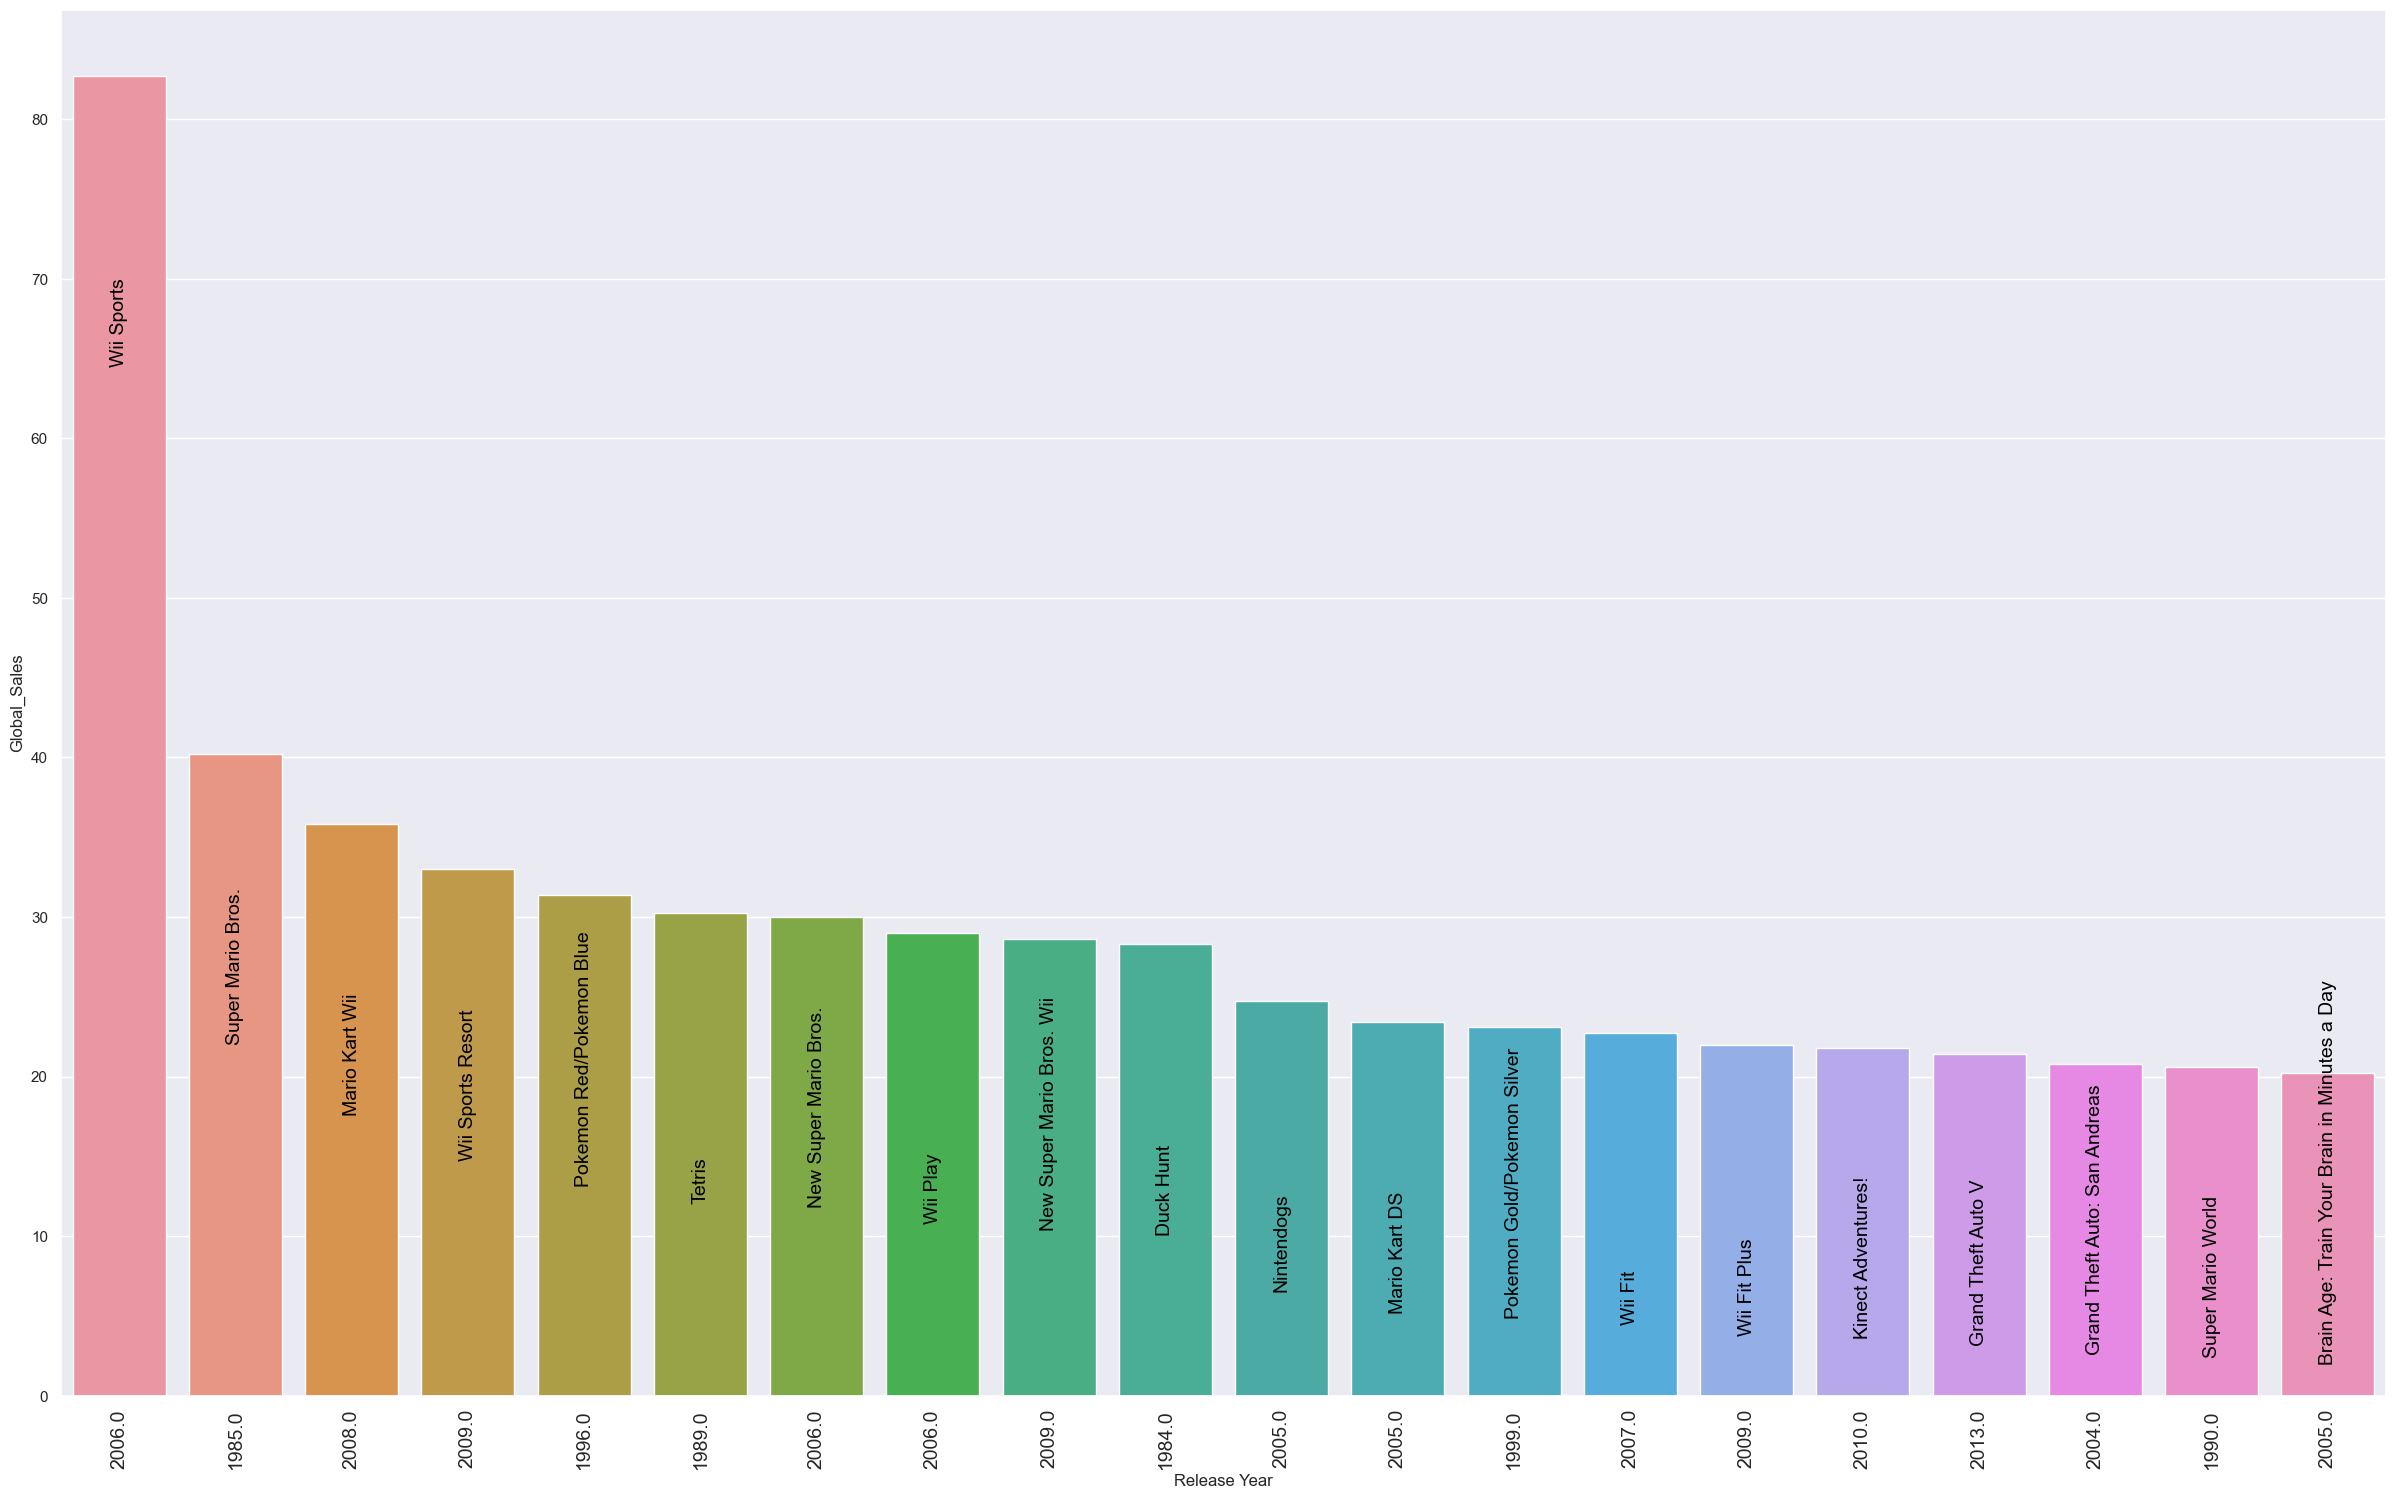

In [64]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value-18, name[index], color='#000', size=14, rotation=90, ha='center')
    index += 1
plt.xticks(y, year, fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

가장 많이 팔린 게임은 Wii Sports이다.  
나: ok 재버 많이 물어봤다. 좀만 기다려봐 내가 재밌는거 보여줄게  
재버: 그래 해보자

# Q10. 장르별 판매 비교

In [26]:
comp_genre = data[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby('Genre').sum()
#comp_map

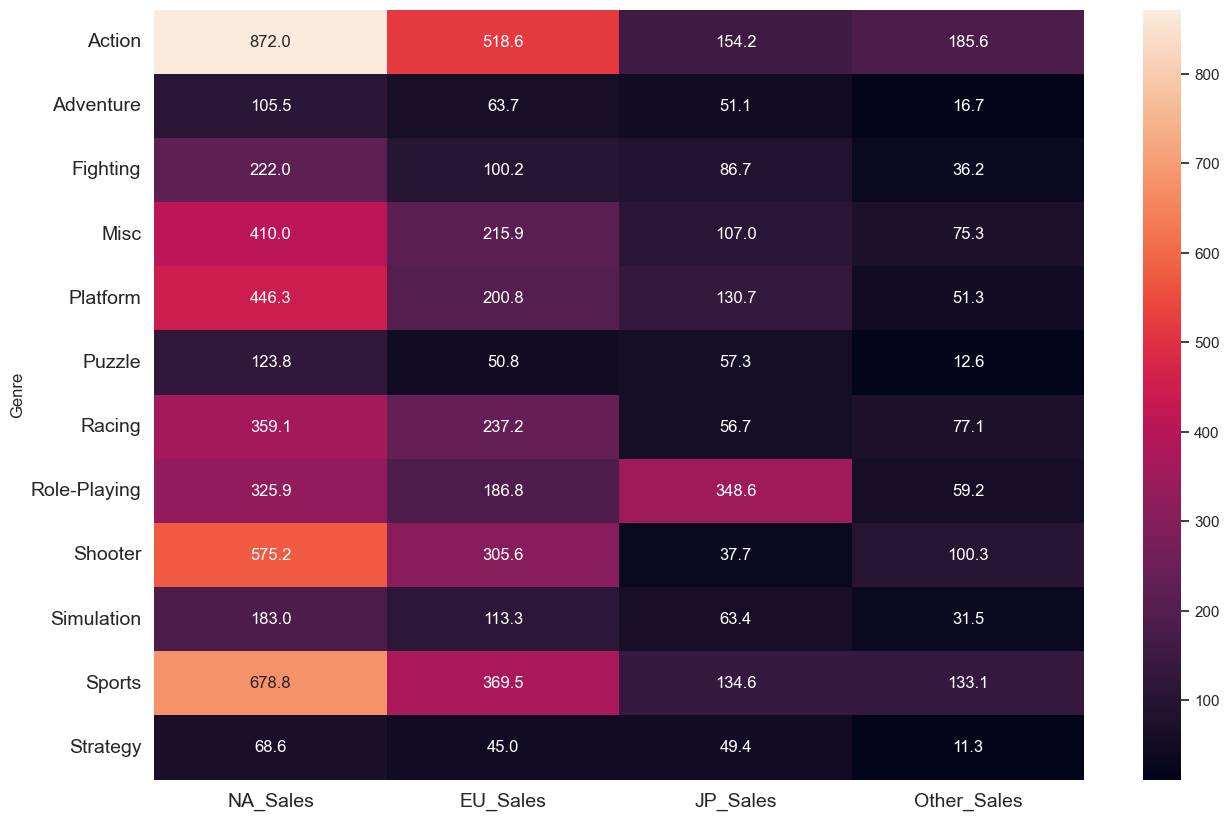

In [27]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt='.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [28]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars='Genre',
                     value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
                     var_name='Sales_Area', value_name='Sale_Price')
comp_table.head()


,Genre,Sales_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<Axes: xlabel='Genre', ylabel='Sale_Price'>

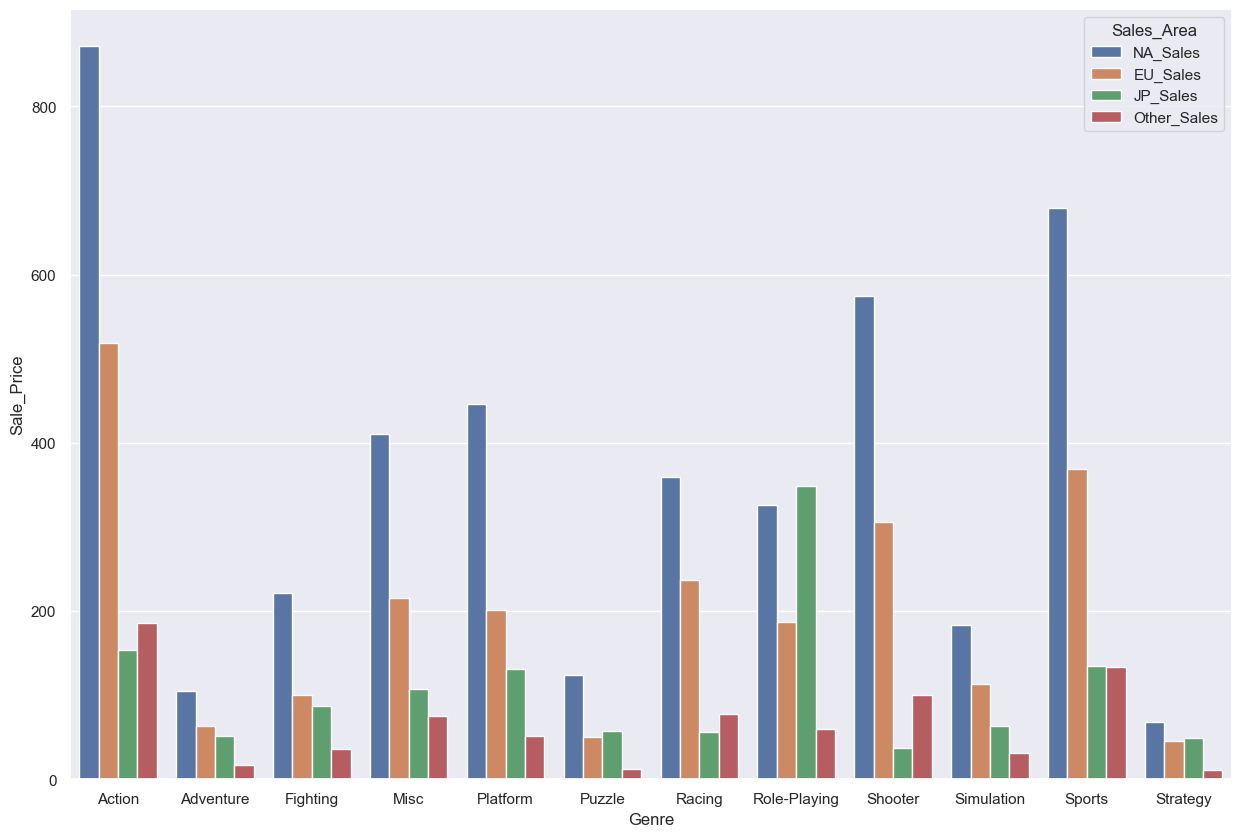

In [29]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sales_Area', data=comp_table)

나: 위에서처럼 액션, 스포츠, 슈팅 장르가 많이 팔렸고, 북미가 항상 판매량이 높네. 미국이 게임을 많이 하는구만

# Q11. 플랫폼별 판매 비교

In [30]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [31]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.04,57.95,92.32,12.51
3,DC,5.43,1.69,8.56,0.27
4,DS,390.44,194.65,175.57,60.51
5,GB,114.32,47.82,85.12,8.20
6,GBA,187.54,75.25,47.33,7.73
7,GC,133.46,38.71,21.58,5.18
8,GEN,19.27,5.52,2.67,0.89
9,GG,0.00,0.00,0.04,0.00


In [32]:
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


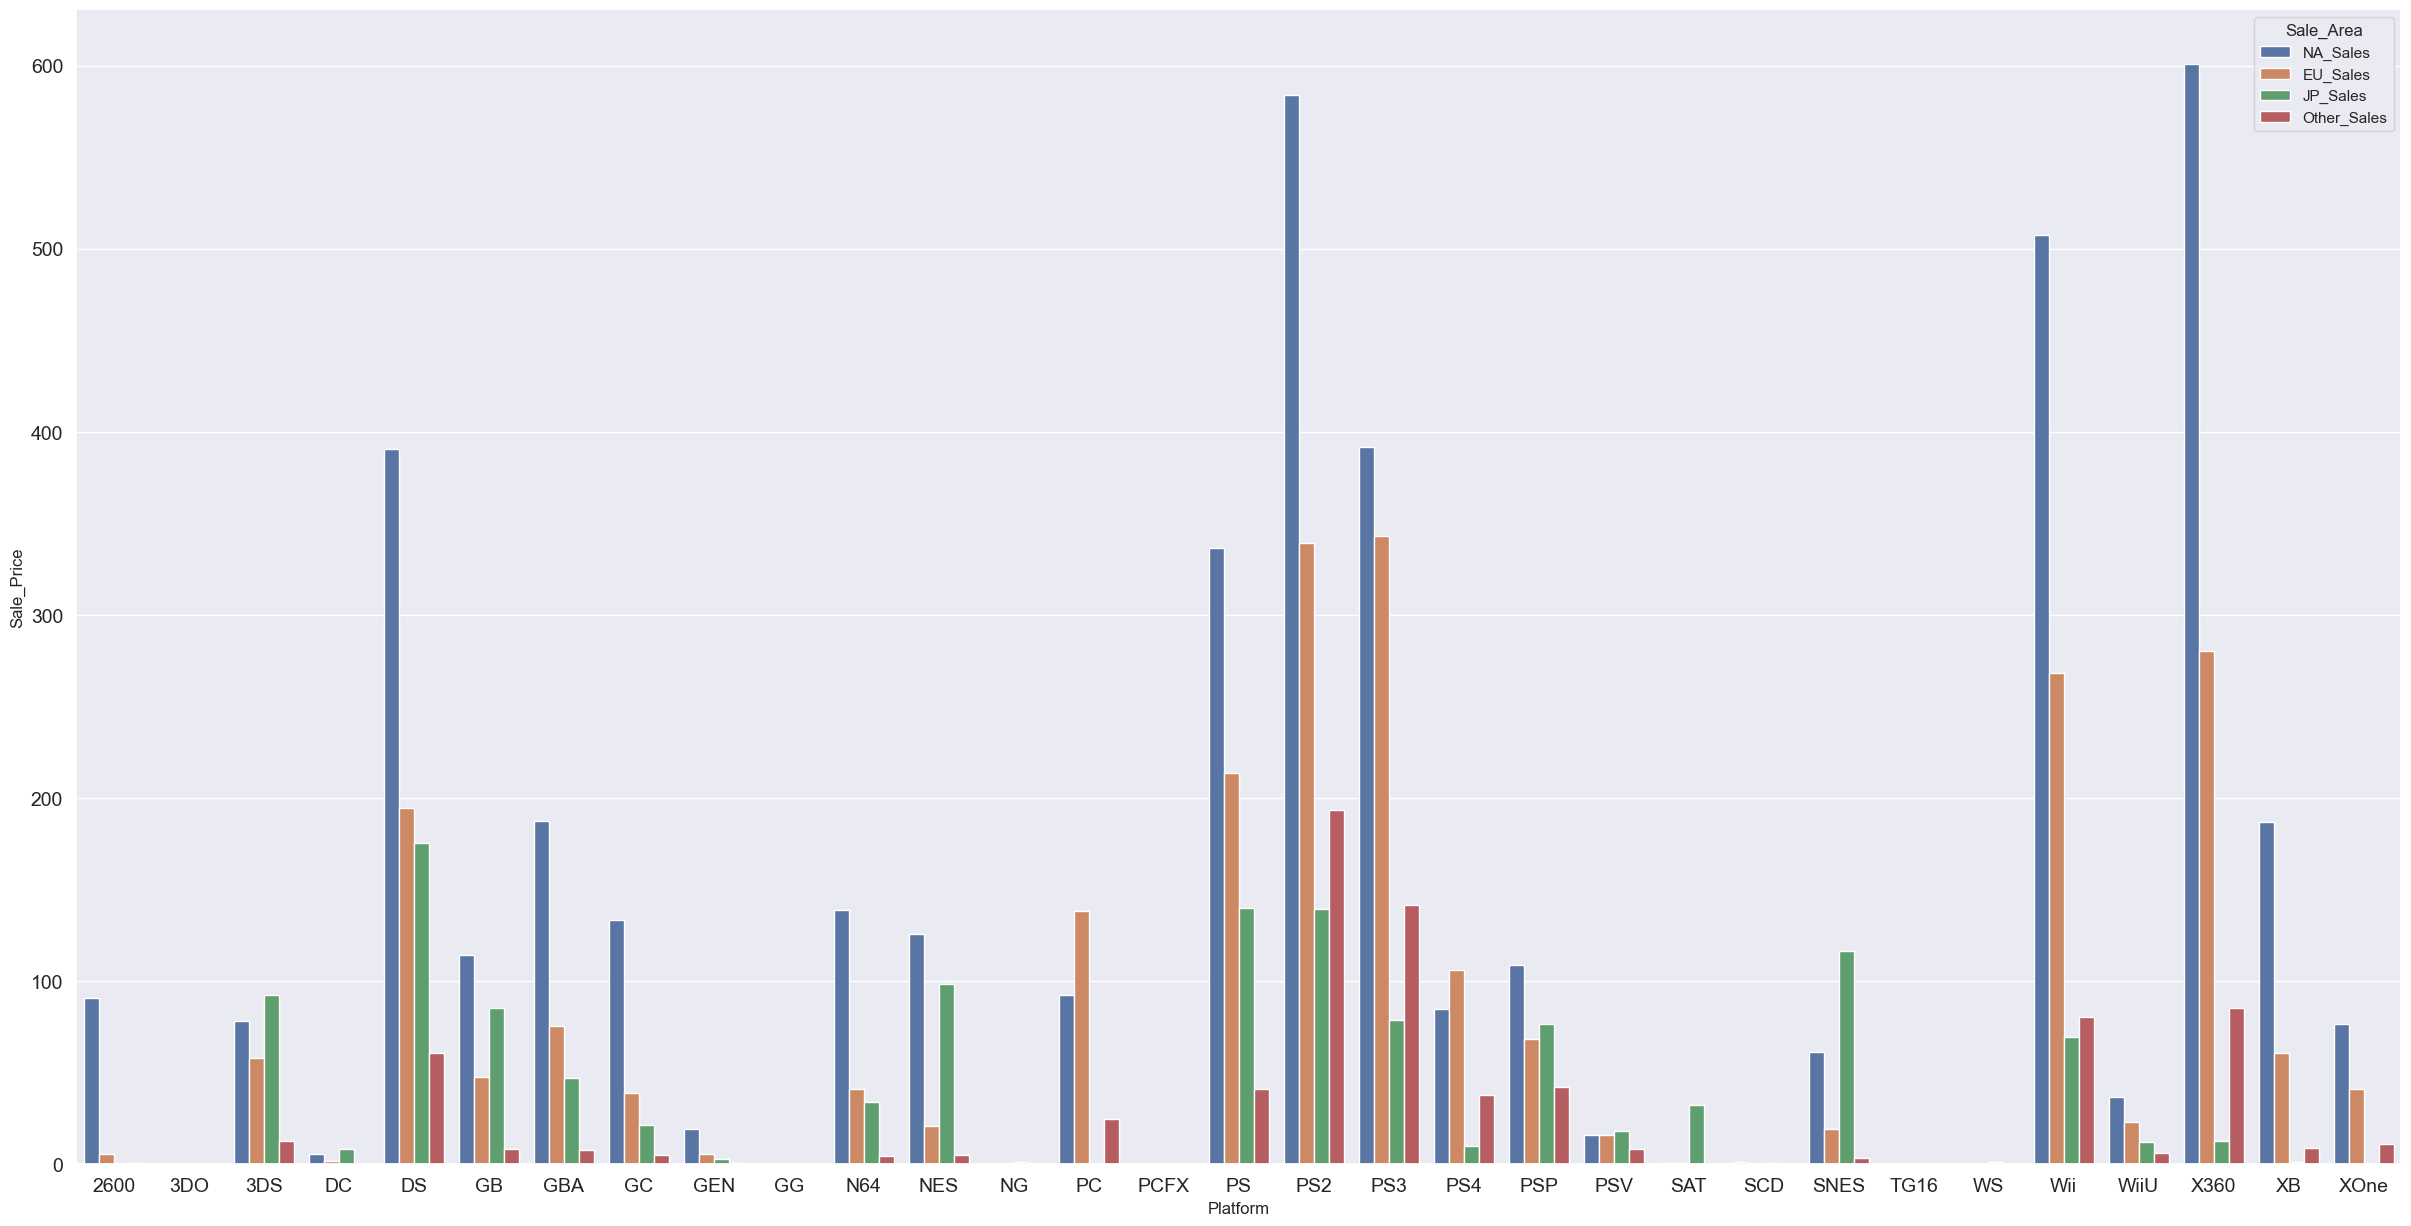

In [33]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

나: 확실하게 X360,Wii,PS가 주도하고 있네. 북미는 항상 top이야. 왜 북미에서 가장 많이 하는지 궁금한데?

# Q12. Top 20 게임사

In [70]:
data[data['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [68]:
top_publisher = data.groupby('Publisher')['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
top_publisher

,Publisher,Year
0,Electronic Arts,1319
1,Activision,952
2,Ubisoft,904
3,Namco Bandai Games,888
4,Konami Digital Entertainment,815
5,THQ,712
6,Nintendo,686
7,Sony Computer Entertainment,677
8,Sega,622
9,Take-Two Interactive,400


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

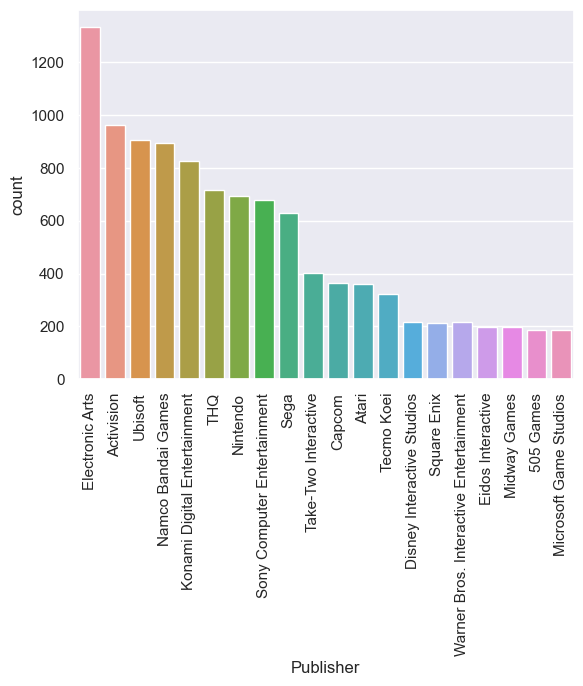

In [35]:
sns.countplot(x='Publisher', data=data, order = data.groupby('Publisher')['Year'].count().\
              sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

재버: Electronic Arts 1339, 엄청많이 팔았다.  
나: 고맙다 EA스포츠

# Q13. 게임사 별 Top global sales

In [36]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl

,Publisher,Global_Sales
0,Nintendo,1783.09
1,Electronic Arts,1098.07
2,Activision,723.79
3,Sony Computer Entertainment,600.94
4,Ubisoft,464.67
5,Take-Two Interactive,396.65
6,THQ,340.77
7,Konami Digital Entertainment,282.43
8,Sega,272.18
9,Namco Bandai Games,247.60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

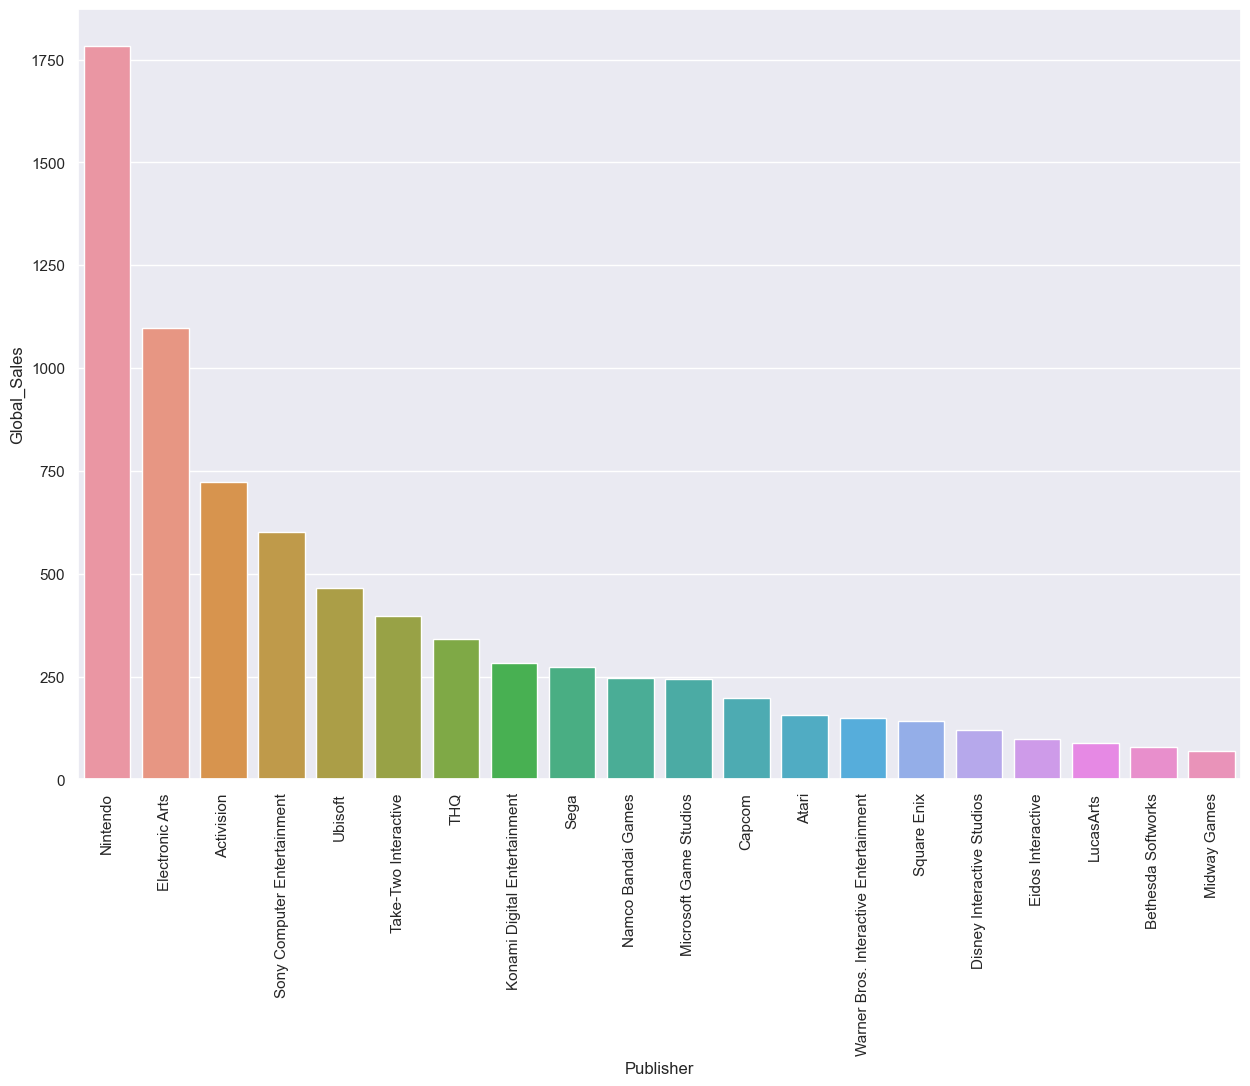

In [37]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

나: 와우 닌텐도가 압도적1등이네.  
재버: 지금까지 닌텐도에서 게임을696개를 냈네, 짱많지  
나: 응 아마도 근데 닌텐도가 top5 게임사는 아니야

# Q14. 게임사 비교

In [38]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
351,Nintendo,815.71,417.81,454.25,95.13,1783.09
137,Electronic Arts,591.43,364.36,13.95,128.14,1098.07
21,Activision,428.03,214.14,6.40,74.90,723.79
446,Sony Computer Entertainment,262.79,184.85,73.88,79.40,600.94
513,Ubisoft,249.31,158.94,7.26,48.96,464.67
483,Take-Two Interactive,218.66,117.52,5.81,54.80,396.65
477,THQ,208.77,94.73,5.01,32.14,340.77
269,Konami Digital Entertainment,92.15,69.21,90.67,30.24,282.43
437,Sega,109.27,81.86,56.54,24.49,272.18
339,Namco Bandai Games,67.52,41.05,124.73,14.11,247.60


In [40]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


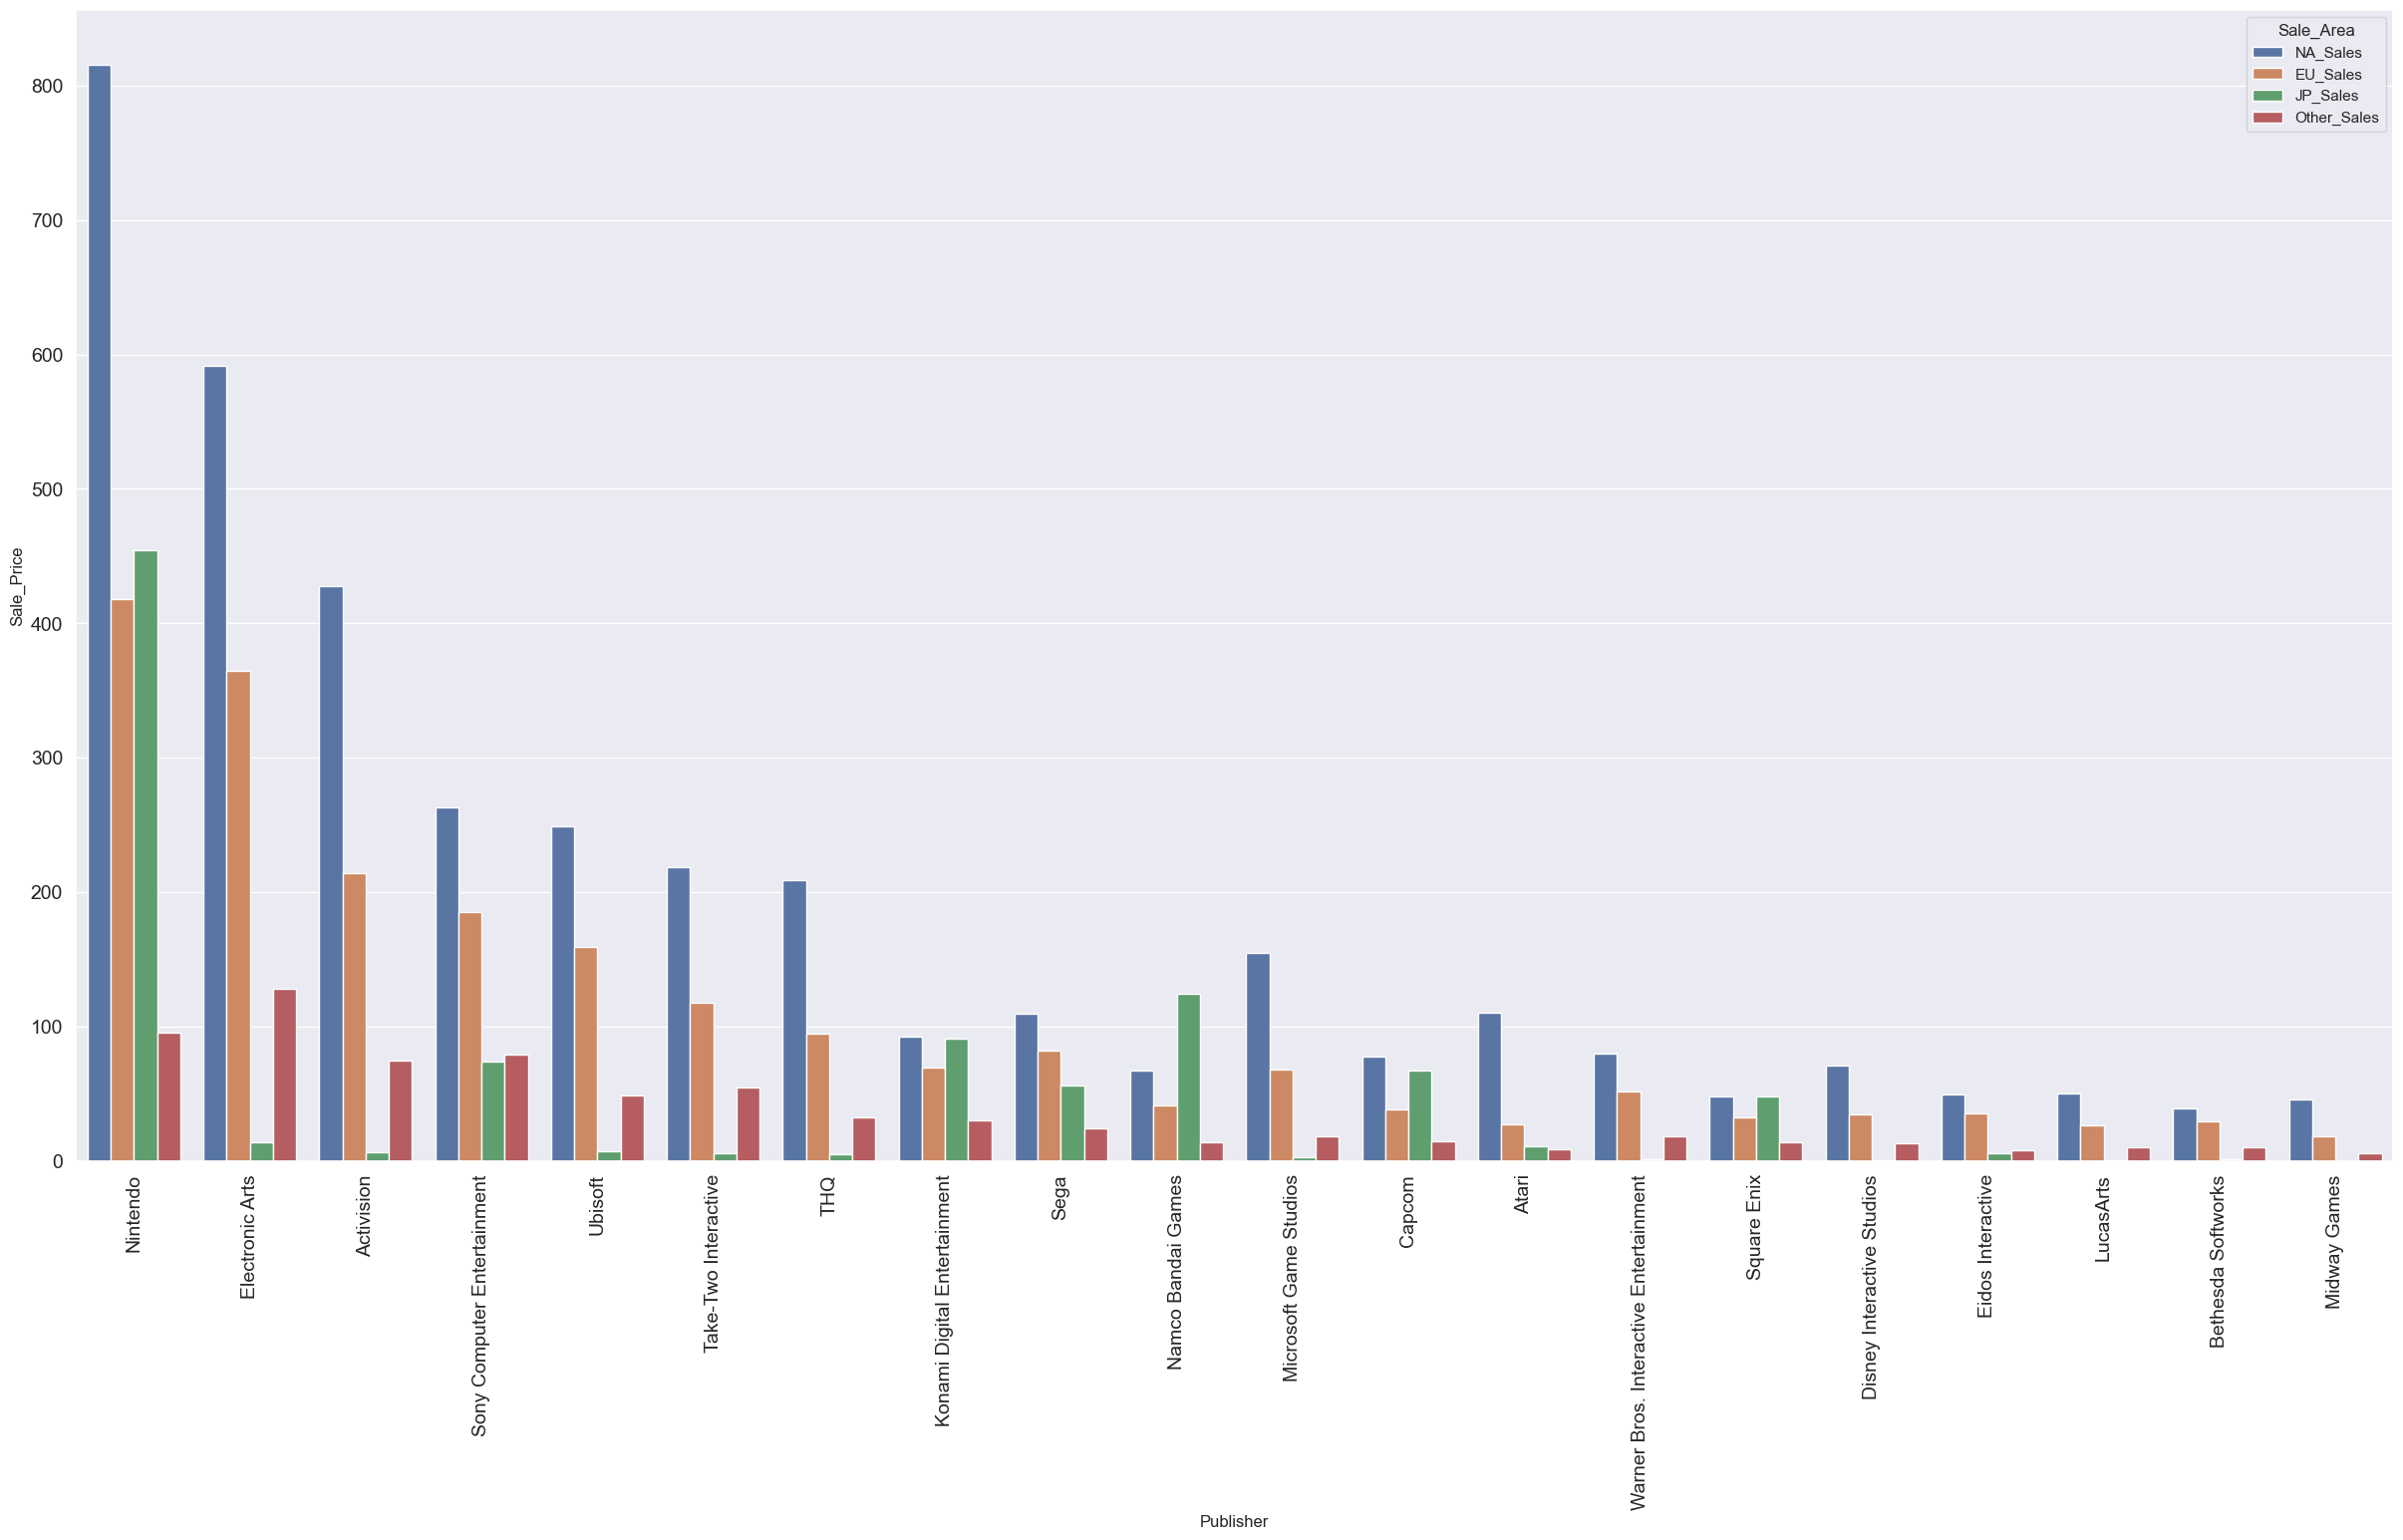

In [41]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# Q15. 각 년도별 Top 게임사

In [72]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
top_publisher_count

,Year,Publisher,Count
0,1980.0,Activision,5
1,1981.0,Atari,11
2,1982.0,Atari,14
3,1983.0,Atari,6
4,1983.0,Nintendo,6
5,1984.0,Nintendo,9
6,1985.0,Nintendo,7
7,1986.0,Nintendo,6
8,1987.0,Atari,4
9,1987.0,Nintendo,4


In [43]:
publisher= top_publisher_count['Publisher']

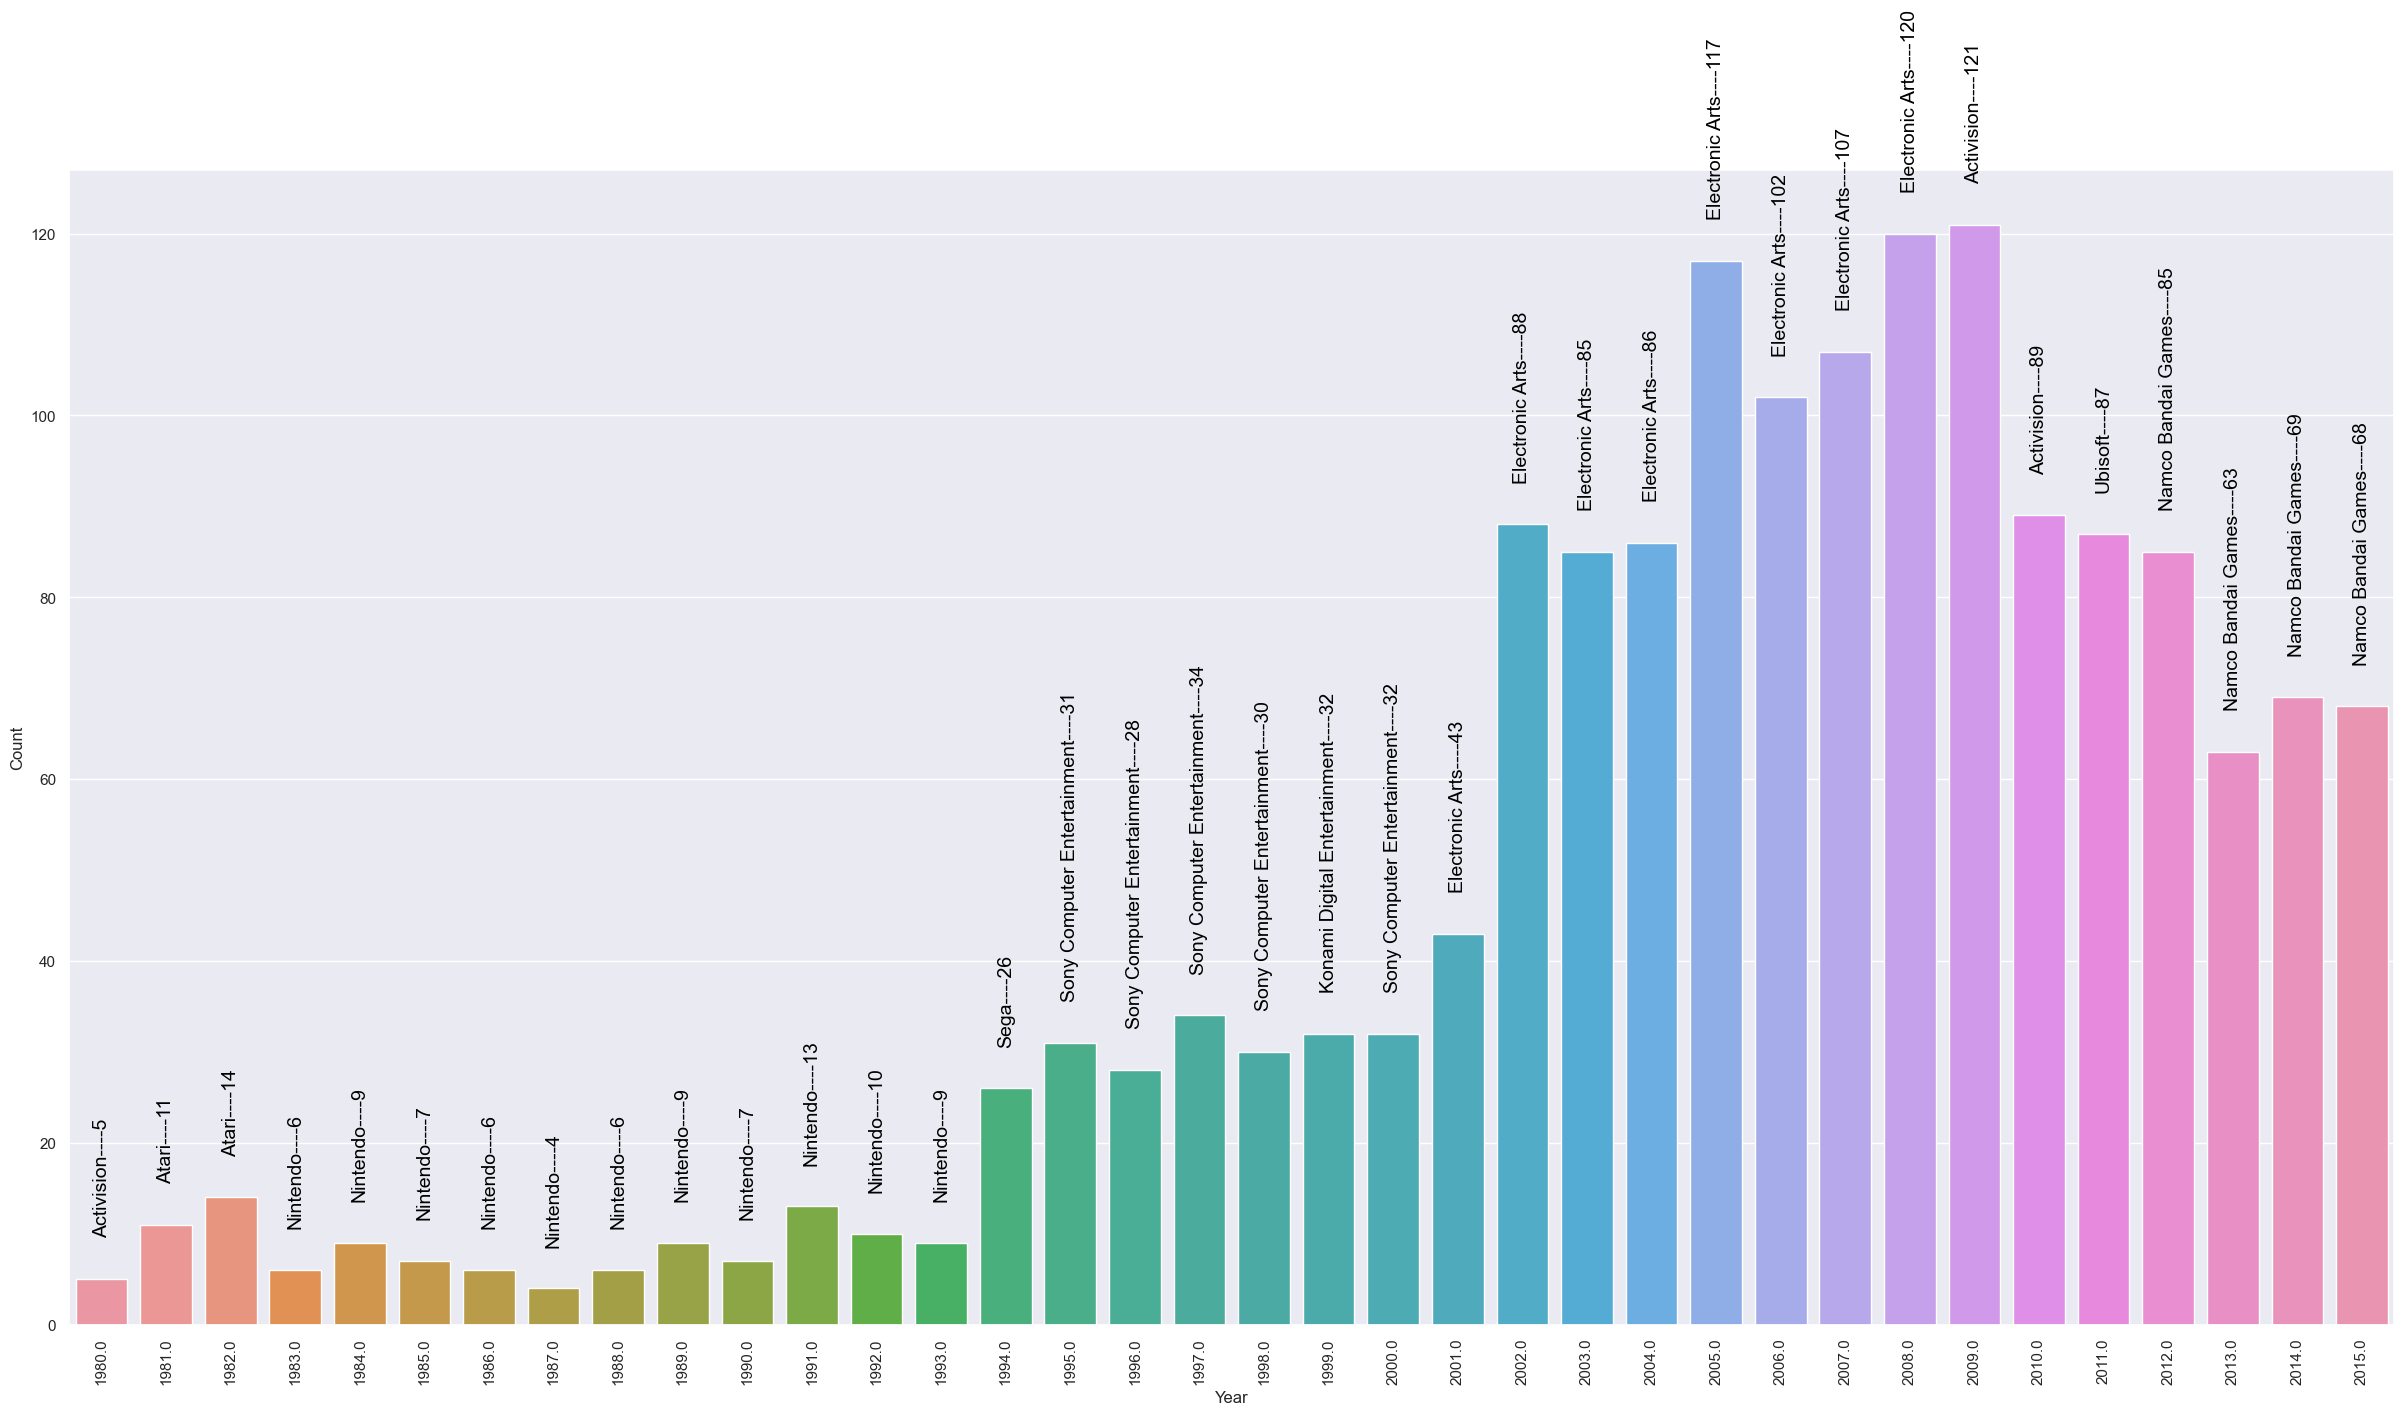

In [44]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

# Q16. 지역별 총 판매량

In [45]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<Axes: xlabel='region', ylabel='sale'>

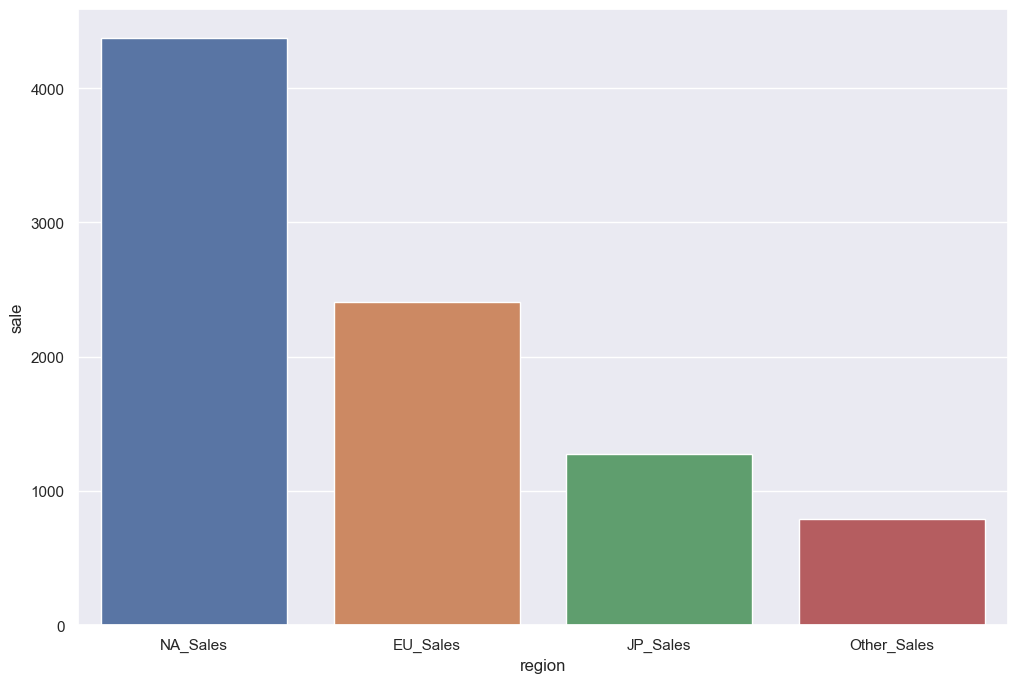

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

파이차트

In [47]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x2a4683c7c70>,
 [Text(-0.02043347298170993, -1.0998101987078979, 'NA_Sales'),
  Text(0.7521005278736487, 0.8027109043560946, 'EU_Sales'),
  Text(-0.580493208417206, 0.9343594784564978, 'JP_Sales'),
  Text(-1.0569786254498315, 0.3046246630563345, 'Other_Sales')],
 [Text(-0.011145530717296325, -0.5998964720224897, '49.4%'),
  Text(0.41023665156744465, 0.4378423114669606, '27.2%'),
  Text(-0.3166326591366578, 0.5096506246126351, '14.4%'),
  Text(-0.5765337956999079, 0.16615890712163697, '8.9%')])

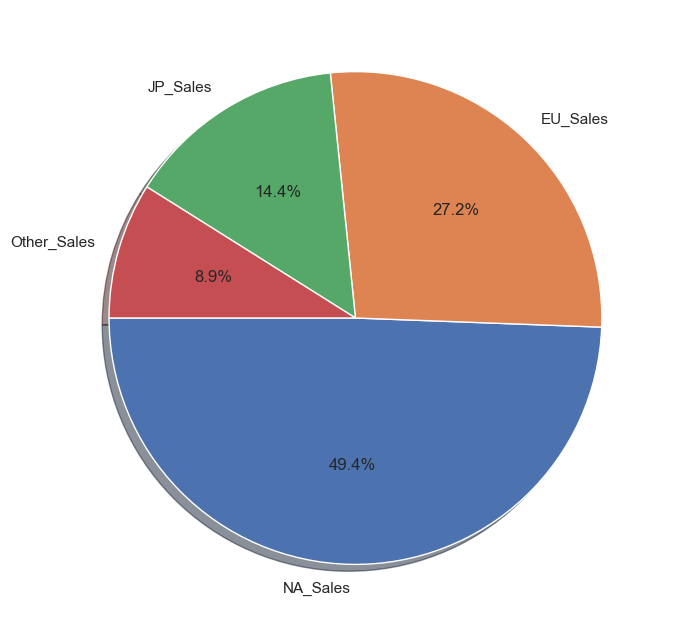

In [48]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)

북미가 거의 50%를 차지한다.

# Q17. 판매량 히스토그램

C:\Users\이정진\AppData\Local\Temp\ipykernel_29628\558813488.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, fit=stats.gamma)
C:\Users\이정진\AppData\Local\Temp\ipykernel_29628\558813488.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde

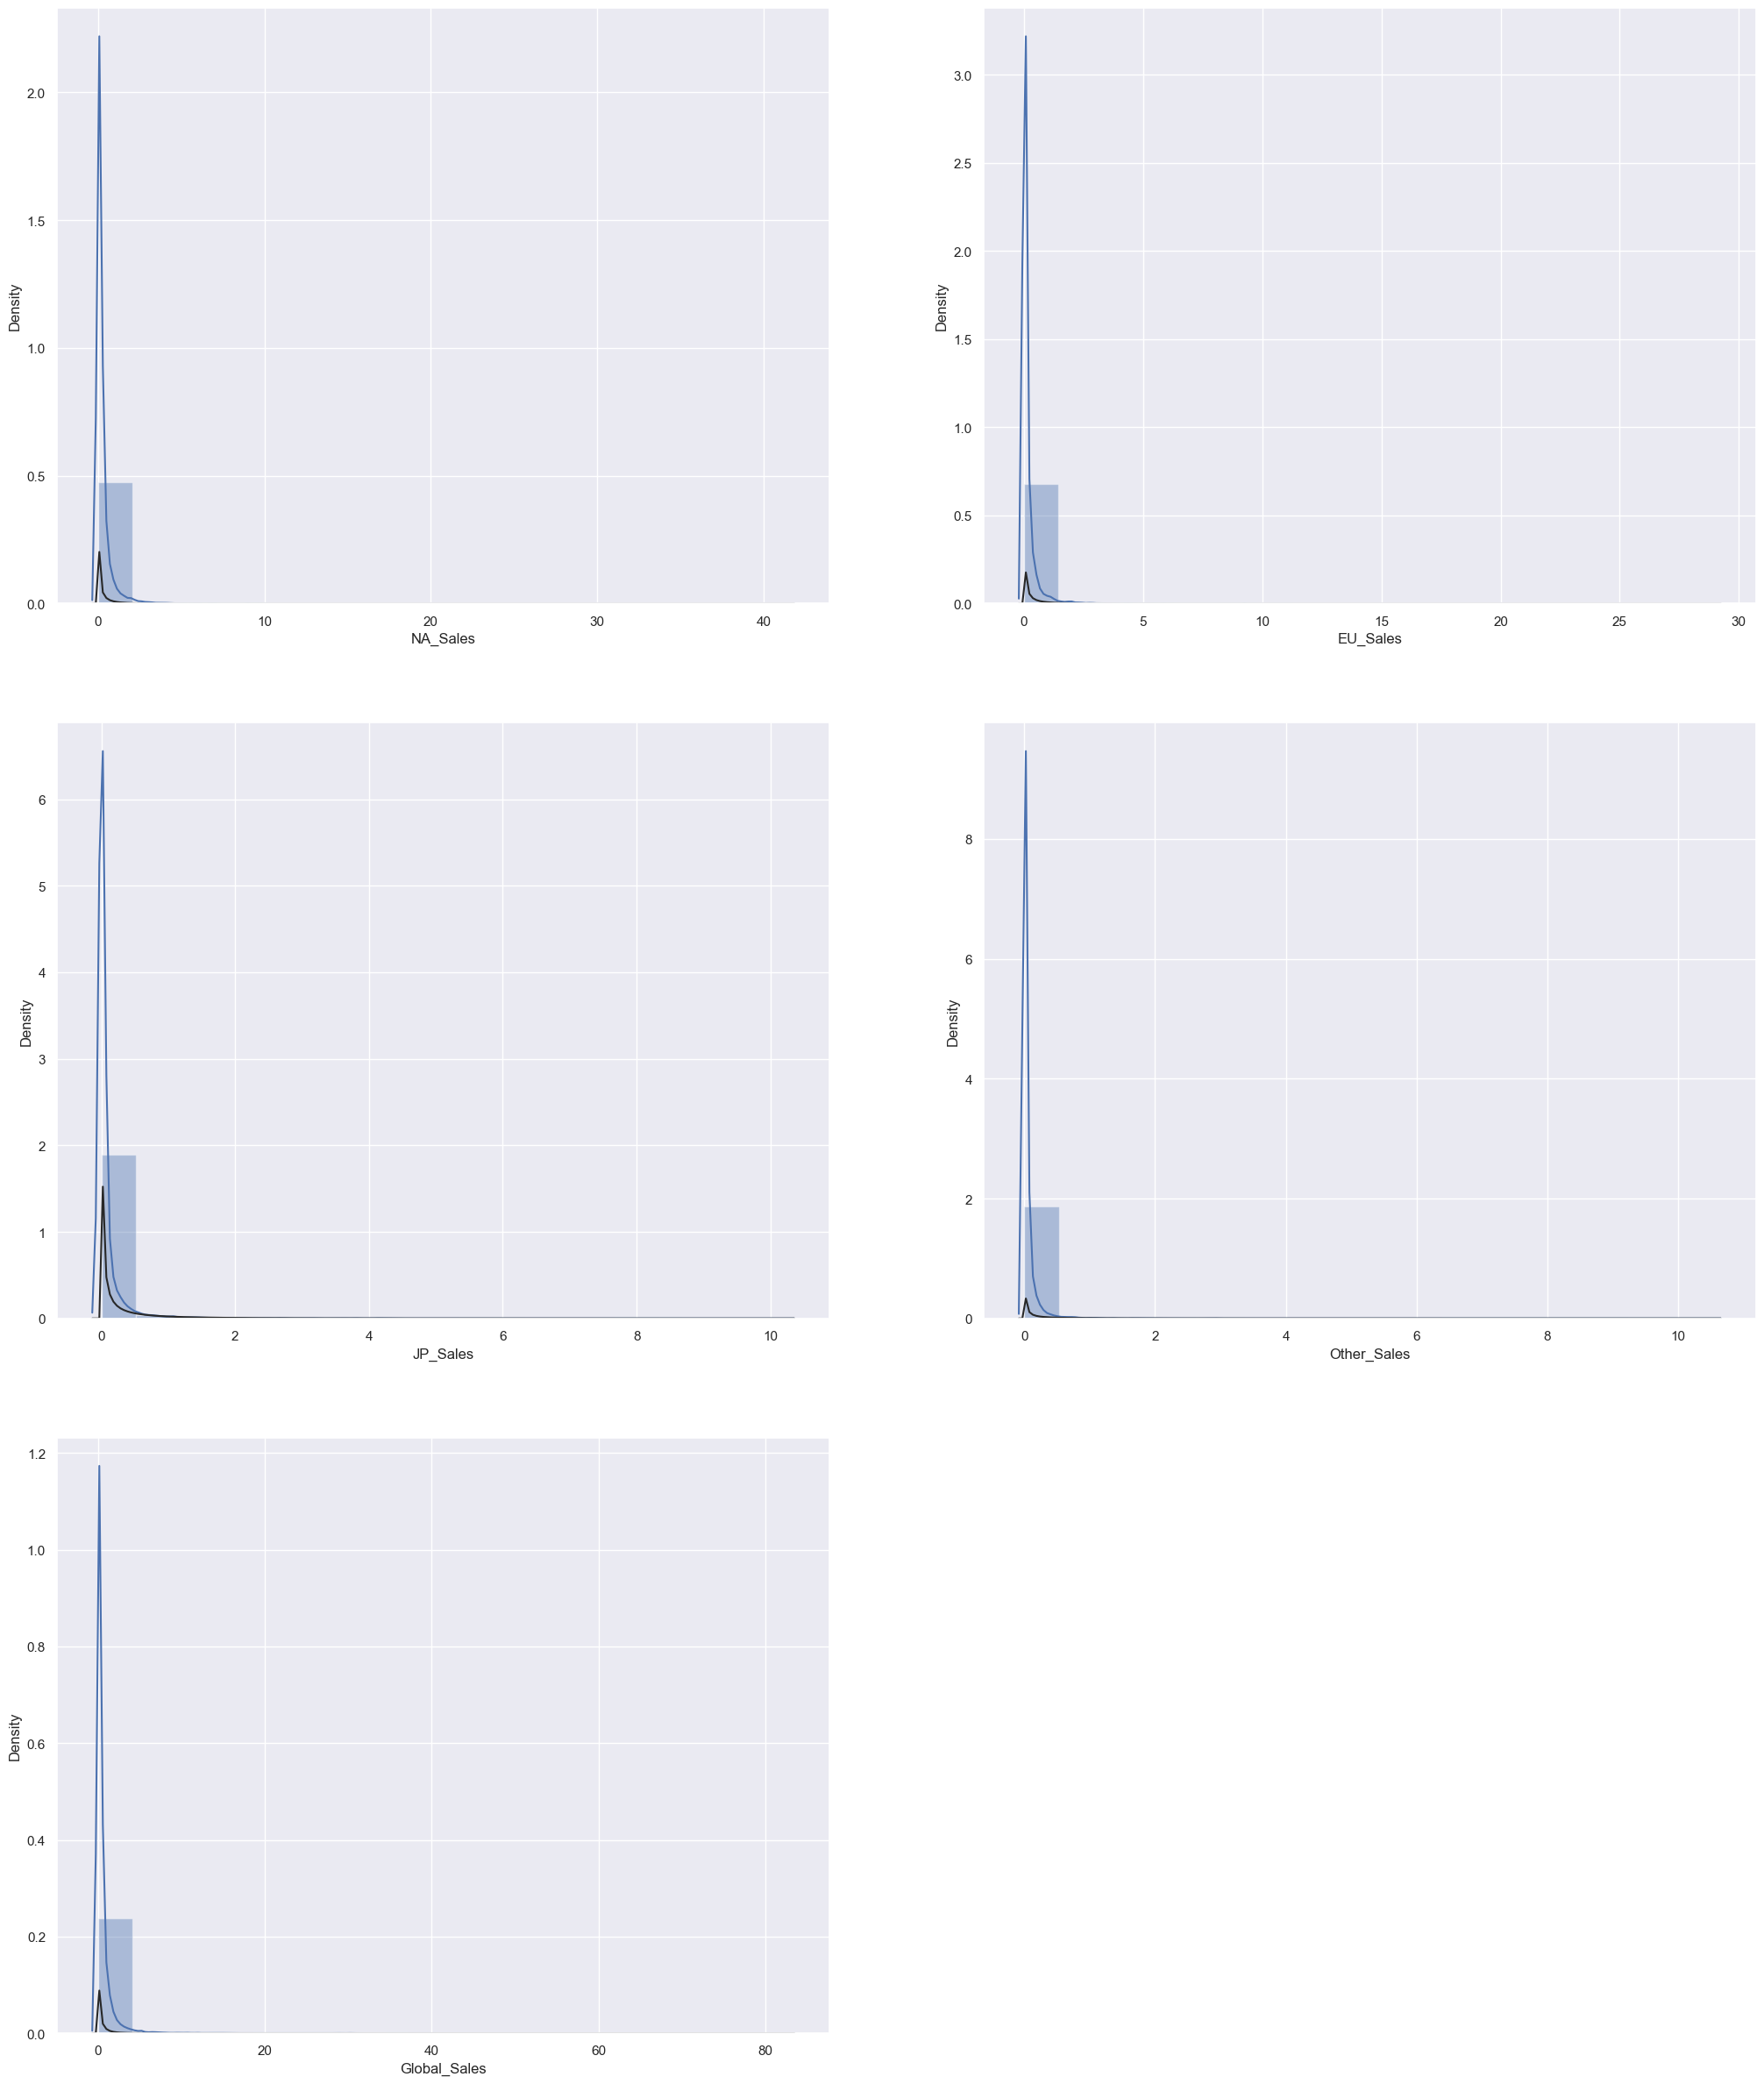

In [75]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=True, fit=stats.gamma)

## Distribution After log transformation

In [50]:
data_hist_log = data.copy()

In [51]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

C:\Users\이정진\AppData\Local\Temp\ipykernel_29628\727389011.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)


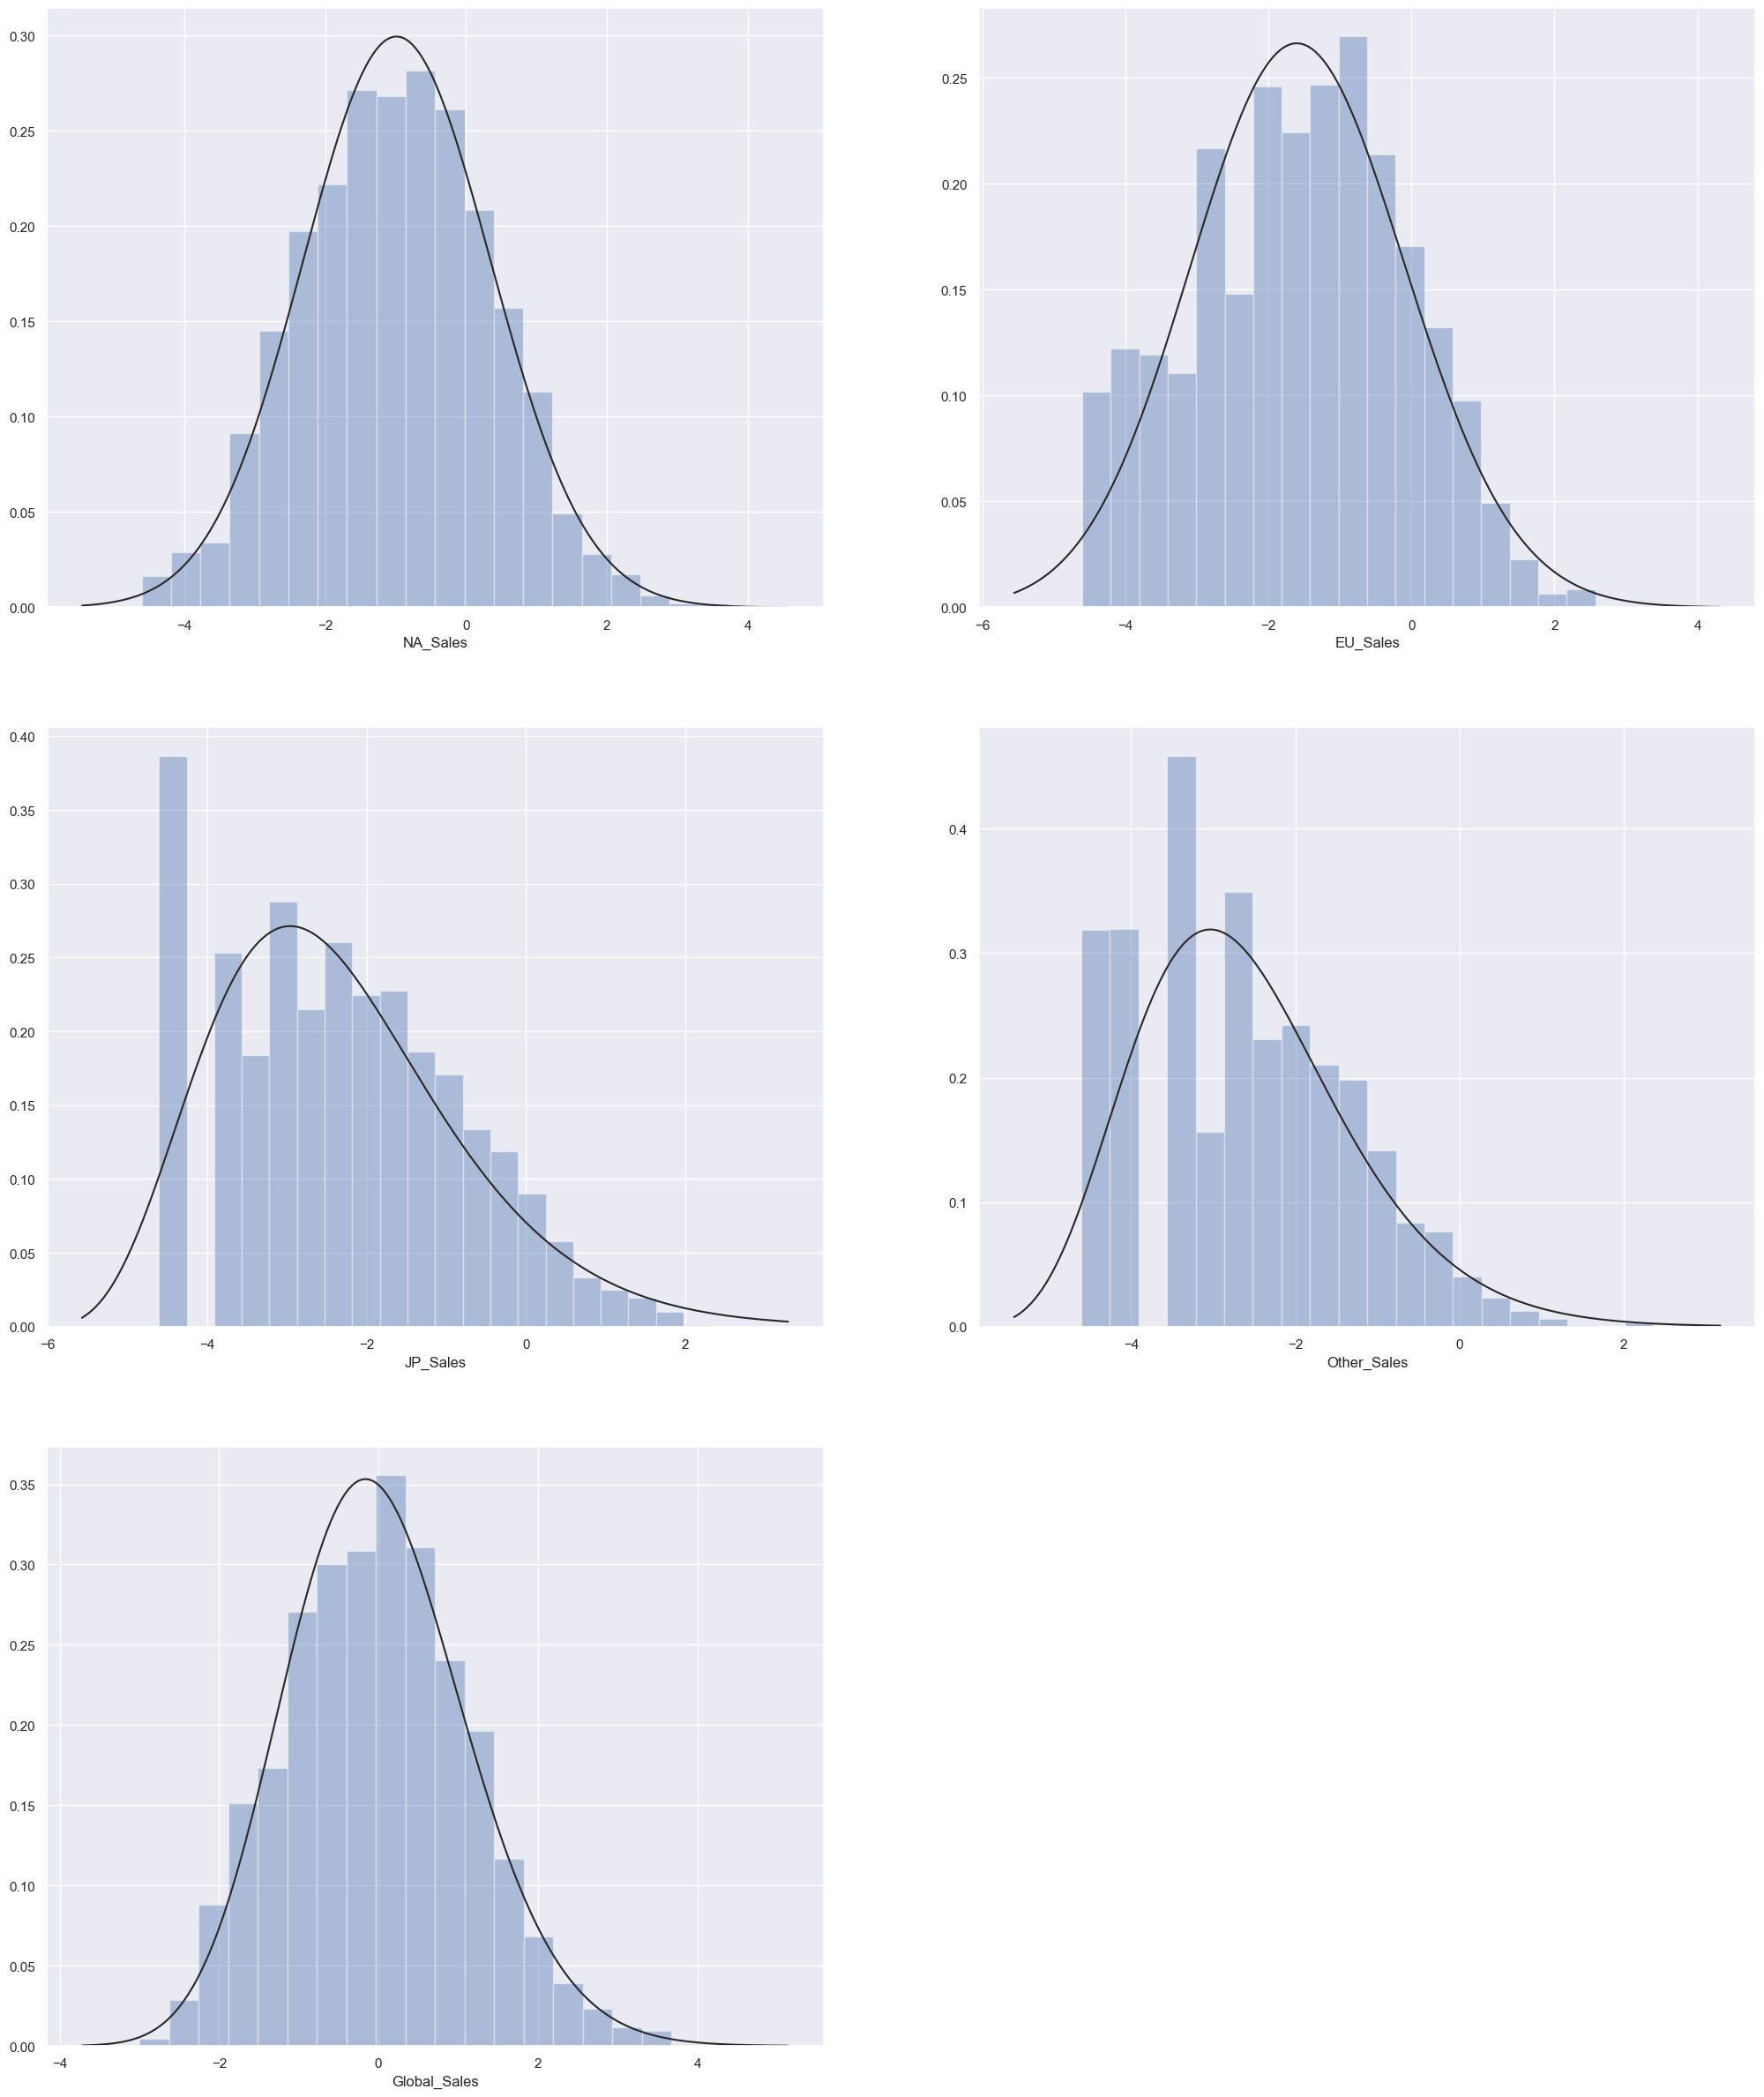

In [52]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

왜도와 central tendancy를 볼 수 있다. 로그변환? 후에 분포가 오른쪽 꼬리가 길거나 대칭적인 모습인 것을 볼 수 있다.

# Q18. 컬럼별 상관관계
heatmap은 상관관계를 보는 좋은 방법이다.

C:\Users\이정진\AppData\Local\Temp\ipykernel_29628\2855184148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)


<Axes: >

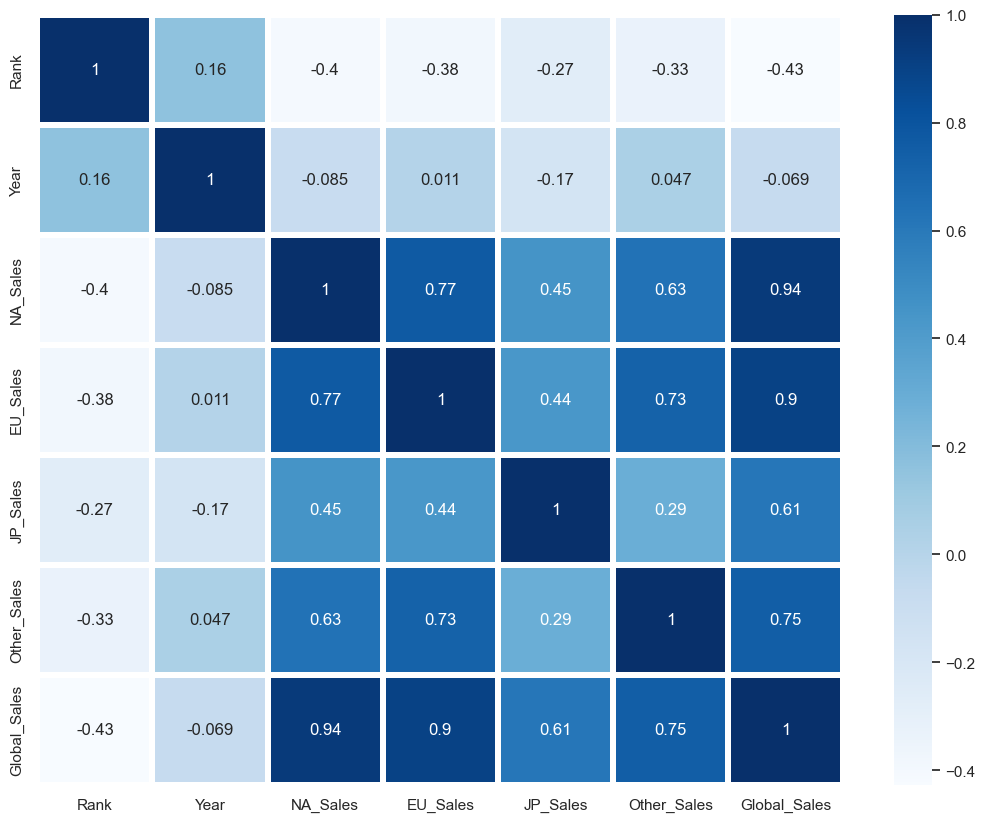

In [53]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

NA, EU 판매량이 Global 판매량에 가장 영향을 많이 준다. 그리고 그 둘은 가장 많이 관련되어 있다.

## Pair plot

In [54]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


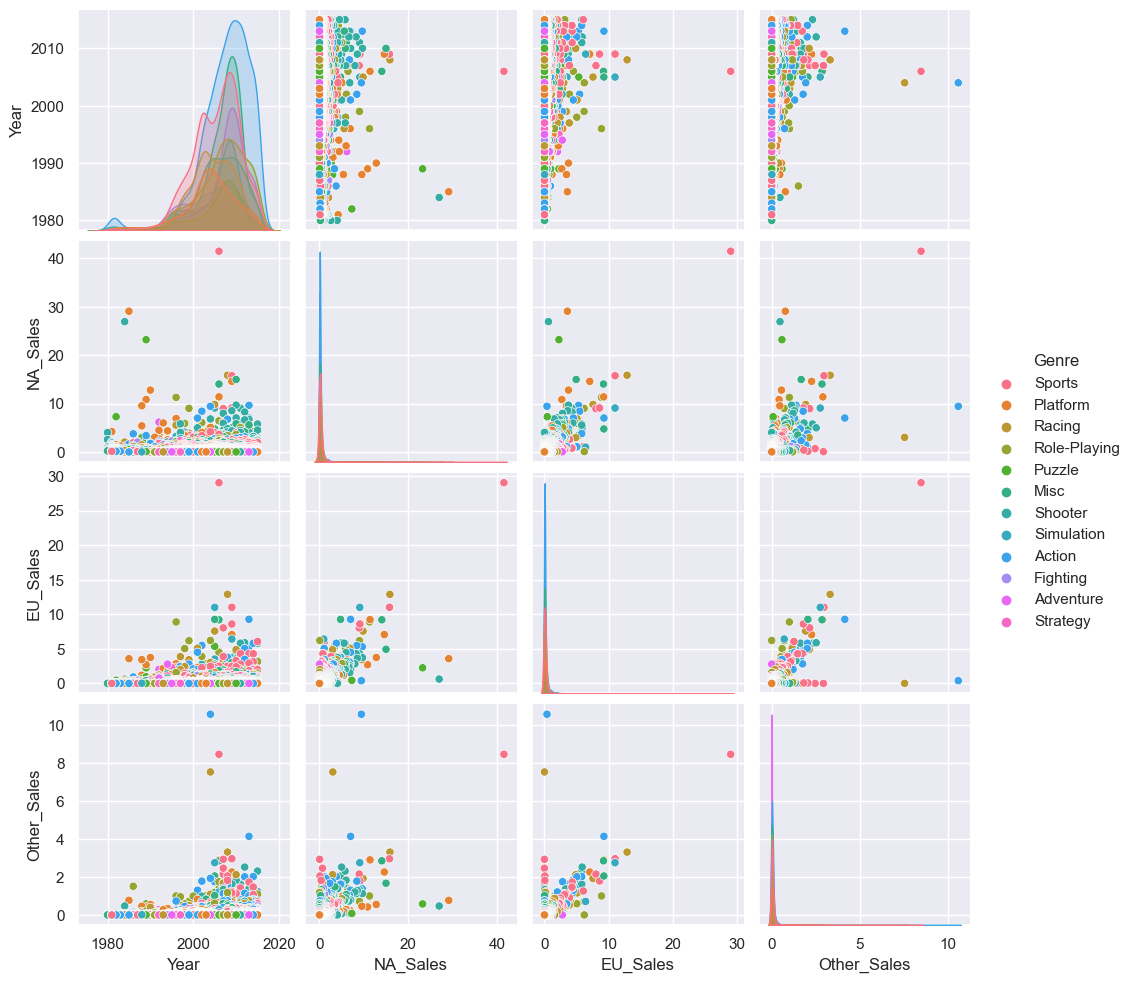

In [55]:
sns.pairplot(data_pair, hue='Genre')

## log work

In [56]:
data_pair_log = data_pair.copy()

In [57]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


In [58]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [59]:
# for column in sale_columns:
#     if 0 in data[column].unique():
#         pass
#     else:
#         data_pair_log[column] = np.log(data_pair_log[column])
# #         data_pair_log.head()

In [60]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [61]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14071,1998.0,PC,Role-Playing,0.01,0.02,0.01
14183,2014.0,PS3,Racing,0.02,0.01,0.01
14185,2011.0,PC,Puzzle,0.01,0.02,0.01
14267,2007.0,PC,Puzzle,0.01,0.02,0.01


In [62]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

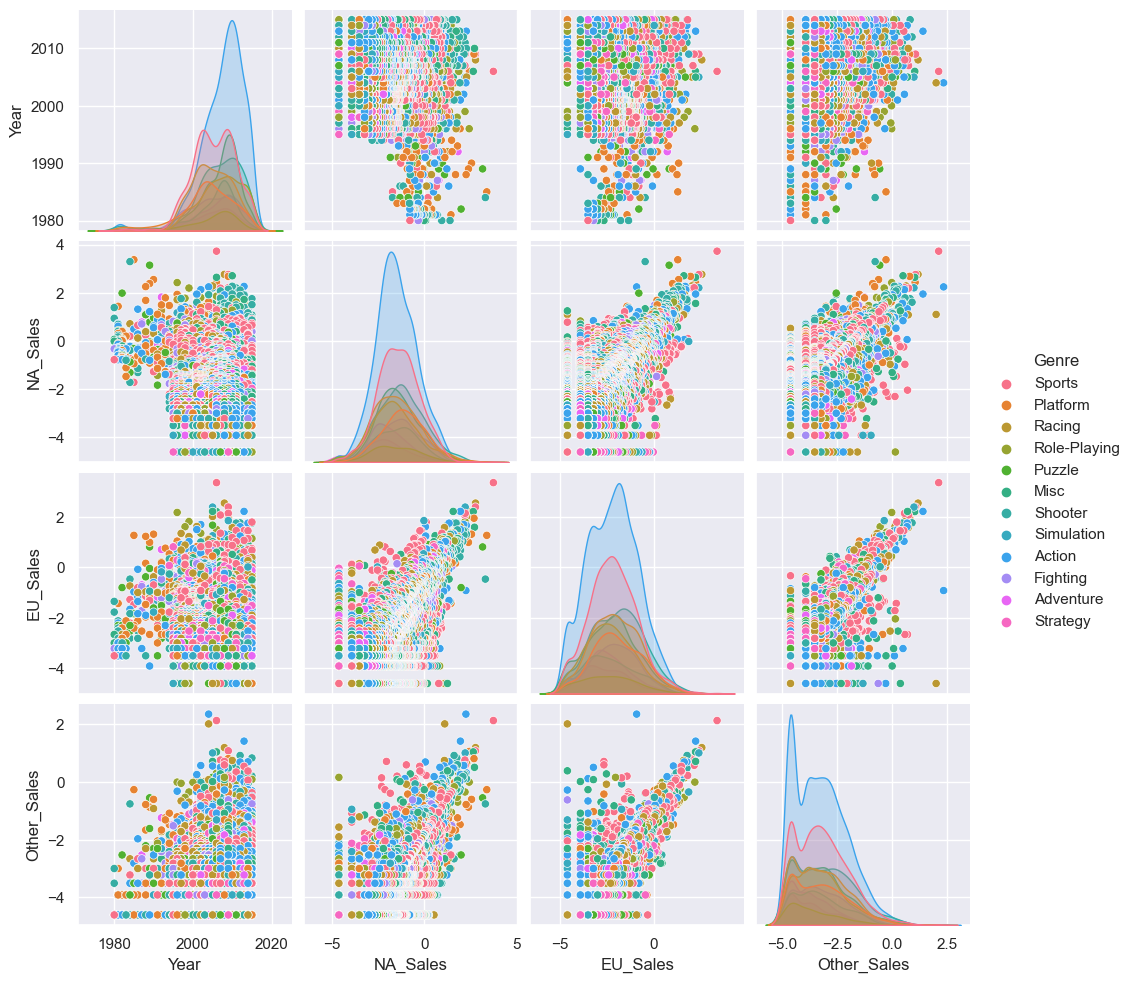

In [63]:
# sns.pairplot(data_pair_log, hue='Genre',  diag_kind = 'kde',
#              plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
#              size = 4)

sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

나: 이제끝! 질문한거 다 알았지?  
재버: 엉 근데 질문몇개 더...  
나: 응 아니야. 늦었어 담에하자 ㅇㅋ?  
재버: ㅇㅋㅇㅋ

Note:  
가상의 이야기인건 알았겠지만 재버는 실제로 제 룸메이트이고 게임을 사랑합니다. 저는 이야기를 상상하는걸 좋아해서 장난 반으로 만들어봤습니다..  
Thank You....